# Агенство недвижимости

## 1. Анализ требований

К нам обратился представитель крупного агентства недвижимости со следующей проблемой:

"Мои риелторы тратят катастрофически много времени на сортировку объявлений и поиск выгодных предложений. Поэтому их скорость реакции, да и, сказать по правде, качество анализа не дотягивают до уровня конкурентов. Это сказывается на наших финансовых показателях".

**Бизнес задача:** разработать сервис для предсказания стоимости домов на основе истории предложений.

**Техническая задача для вас как для специалиста в Data Science**: — разработать модель, которая позволила бы обойти конкурентов по скорости и качеству совершения сделок.

Исходя из бизнес-задачи, для решения которой необходимо определить количественную величину(стоимость домов) по определённым параметрам, то определяем тип машинного обучения, с которым мы будем работать - это задача регрессии.

**ПЛАН ПРОЕКТА**

**1. Анализ требований**
- постановка целей
- создание плана проекта

**2. Исследование данных** цель - понять слабые и сильные стороны предоставленных данных, определить их достаточность, предложить идеи, как их использовать, и лучше понять процессы заказчика
- сбор данных
- описание данных

**3. Подготовка данных** цель этого этапа — подготовить обучающую выборку для использования в моделировании.
- оценка качества данных
- очистка данных
- проектирование признаков
- отбор признаков

**4. Моделирование** обучение моделей. Определить, готова ли какая-то из моделей к внедрению, достигаются ли заданные критерии качества.
- выбор алгоритмов
- планирование тестирования
- обучение моделей
- анализ результатов

**5. Оценка модели**
- оценка результатов моделирования
- принятие решения о внедрении

**6. Внедрение**
- развёртывание модели на сервере

## 2. Исследование данных

Данные, предоставленные заказчиком находятся на [ресурсе](https://drive.google.com/file/d/11-ZNNIdcQ7TbT8Y0nsQ3Q0eiYQP__NIW/view?usp=share_link). Импортируем необходимые библиотеки и познакомимся с данными:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
import plotly.graph_objects as go  
import math
import ast
import datetime
from scipy.stats import f_oneway
from dmba import AIC_score, stepwise_selection
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import optuna
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import pickle


import plotly.io as pio
#pio.renderers.default= 'png'

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

c:\Python\Notebook\Блок 8. Итоговый проект первого года обучения\project_10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
date = pd.read_csv(r'data\data.csv')

date_estate = date.copy()
print(date_estate.shape)
date_estate.head()

(377185, 18)


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'NR', 'NR'], 'data': {'Distance': ['2.7 mi', '3.6 mi', '5.1 mi', '4.0 mi', '10.5 mi', '12.6 mi', '2.7 mi', '3.1 mi'], 'Grades': ['3–5', '6–8', '9–12', 'PK–2', '6–8', '9–12', 'PK–5', 'K–12']}, 'name': ['Southern Pines Elementary School', 'Southern Middle School', 'Pinecrest High School', 'Southern Pines Primary School', ""Crain's Creek Middle School"", 'Union Pines High School', 'Episcopal Day Private School', 'Calvary Christian Private School']}]",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '5828 sqft', 'factLabel': 'lotsize'}, {'factValue': '$159/sqft', 'factLabel': 'Price/sqft'}]}",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'factLabel': 'Year built'}, {'factValue': '1967', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': 'Attached Garage', 'factLabel': 'Parking'}, {'factValue': '8,626 sqft', 'factLabel': 'lotsize'}, {'factValue': '$965/sqft', 'factLabel': 'Price/sqft'}]}",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': {'Distance': ['1.19mi', '2.06mi', '2.63mi'], 'Grades': ['6-8', 'K-5', '9-12']}, 'name': ['Paul Revere Middle School', 'Brentwood Science School', 'Palisades Charter High School']}]","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'factLabel': 'Year built'}, {'factValue': '2006', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': 'Detached Garage', 'factLabel': 'Parking'}, {'factValue': '8,220 sqft', 'factLabel': 'lotsize'}, {'factValue': '$371/sqft', 'factLabel': 'Price/sqft'}]}",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'], 'data': {'Distance': ['1.05mi', '0.1mi', '1.05mi', '0.81mi'], 'Grades': ['5-6', 'PK-4', '7-8', '9-12']}, 'name': ['Mcculloch Intermediate School', 'Bradfield Elementary School', 'Highland Park Middle School', 'Highland Park High School']}]","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '10,019 sqft', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': {'Distance': ['5.96mi', '3.25mi', '3.03mi'], 'Grades': ['7-8', '9-12', 'PK-6']}, 'name': [

В датасете имеем 377185 разных объектов недвижимости описанных восемнадцатью признаками:

1. status - статус продажи
2. private pool - частный бассейн
3. propertyType - тип недвижимости
4. street - улица
5. baths - число ванных комнат 
6. homeFacts - сведения о доме 
7. fireplace - тип отопления
8. city - город
9. schools - школы
10. sqft - квадратный фут
11. zipcode - почтовый индекс
12. beds - число комнат
13. state - штат
14. stories - этажность
15. mls-id - это код в их централизованной системе учёта предложений объектов недвижимости
16. PrivatePool - частный бассейн
17. MlsId - это код в их централизованной системе учёта предложений объектов недвижимости
18. target - целевой признак, цена недвижимости

Взглянем на общую картину с признаками:

In [5]:
date_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Сразу видим, что все признаки представлены типом object, в том числе целевой, также имеются пропуски во всех признаках. 

Сформилируем дальнейшую схему работы/обработки данных на следующем этапе:

1. Привести целевой признак(target) к числовому типу
2. Обработать пропуски в целевом признаке(target)
3. Проанализировать и удалить неинформативные признаки
4. Отдельно обработать информацию в признаках homeFacts и school, содержащие пул данных
5. Обработать пропуски в остальных признаках
6. Спроектировать новые признаки
7. Визуализировать данные, найти зависимости, гипотезы

## Подготовка данных

### **target(цена недвижимости)**

Для начало разберёмся с целевым признаком(target). Так как в нём присутствуют различные символы, отличные от цифр, то напишем функцию, которая позволит избавиться от них и преобразовать их в формат integer. 

In [6]:
def target_change(target):
    """ Очищает целевую от посторонних символов

    Args:
        target (object): неочищенная целевая переменная

    Returns:
        int: возвращает очищенную целевую переменную target в формате integer(кроме пропущенных значений)
    """
    
    number_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    # создаём новый лист, куда будем добавлять символы, если они присутствуют в number_list
    target_new = []
    # если нет пропуска, то разбиваем посимвольно и проверяем каждый символ на соответствие number_list
    if target is not np.nan:
        target_list = list(str(target))
        for i in target_list:
            if i in number_list:
               target_new.append(i)
        # соединяем все цифры воедино и преобразуем в формат integer
        target_int = int(''.join(target_new))        
        return target_int
    # если имеется пропущенное значение, то преобразований не проводим
    else:
        return target
    
date_estate['target_clear'] = date_estate['target'].apply(target_change)
# удаляем признак target
date_estate = date_estate.drop(['target'], axis=1)

Новый целевой признак target_clear. Взглянем на пропуски:

In [7]:
print(f'Число пропусков в target_clear = {date_estate["target_clear"].isnull().sum()}.')

Число пропусков в target_clear = 2481.


имеем 2481 пропусков в целевой переменной. Напишем функцию, которая на вход принимает датасет и заполняет пропущенные значения медианными ценами на жильё в зависимости от штата(state) и типа недвижимости(propertyType), таким образом более гибко подойдём к заполнению пропусков, хотя от общего объёма датасета число пропусков невелико и вполне можно было обойтись медианным значением цены недвижимости по всему датасету. Данная функция может понадобиться в дальнейшем, если объём данных возрастёт/произойдёт неравномерный скачок цен на недвижимость в разных штатах и т.д.

In [8]:
def pass_processing(df):
    """ Обрабатывает пропущенные значения в
    целевой переменной target_clear

       Args:
           df (DateFrame): датафрейм

       Returns:
           DataFrame: датафрейм с обработанным признаком
       """
   
    # датасет без пропущенных значений
    data_good = df[~df['target_clear'].isnull()]
    # лист с уникальными значениями штатов
    uni = list(data_good['state'].unique())
    # датасет-справочник с медианными ценами в разрезе штатов и типов недвижимости
    df_values = pd.DataFrame(data_good[data_good.state.isin(uni)].groupby(['state', 'propertyType'])['target_clear'].median().reset_index())
    # для удобства объединим столбцы state и propertyType в state_type_values
    df_values['state_type_values'] = df_values['state'] + '_' + df_values['propertyType']
    df['state_type_values'] = df['state'] + '_' + df['propertyType']
    # удалим лишние столбцы
    df_values = df_values.drop(['state', 'propertyType'], axis=1)
    
    # объединяем исходный датафрейм с данными из справочника 
    df_merge = df.merge(
    df_values,
    on='state_type_values',
    how='left'
           )
    # заполним пропущенные значения на No для удобства
    df_merge['target_clear_x'] = df_merge['target_clear_x'].fillna('No')
    # обрабатываем пропуски в целевом столбце
    df_merge['target_clear_x'] = df_merge.apply(lambda x: x.target_clear_y if x.target_clear_x=='No' else x.target_clear_x, axis=1)
    # удаляем лишние столбцы 
    df_merge = df_merge.drop(['state_type_values', 'target_clear_y'], axis=1).rename(columns={'target_clear_x':'target_clear'})
    # заполняем недостающие пропуски, которых не было в справочнике на медиану
    df_merge['target_clear'] = df_merge['target_clear'].fillna(df['target_clear'].median())
    
    return df_merge

date_estate = pass_processing(date_estate)
print(f'Количество пропусков = {date_estate["target_clear"].isnull().sum()}.')   

Количество пропусков = 0.


Посмотрим на описательные статистики по целевой переменной(target_clear):

In [9]:
date_estate['target_clear'].describe()

count    3.771850e+05
mean     6.428399e+05
std      1.835567e+06
min      1.000000e+00
25%      1.879000e+05
50%      3.200000e+05
75%      5.799900e+05
max      1.950000e+08
Name: target_clear, dtype: float64

Сразу заметим, что медианная стоимость недвижимости $320 000(при средней $642839,9 - большей в 2 раза), за меру центральной тенденции будем понимать именно медианное значение цены так как оно является робустной характеристикой(устойчивой к выбросам). А так же имеется недвижимость стоимостью $1, что явно является выбросом - возможно данные некорректно занесены в базу. Посмотрим на распределение целевой переменной:

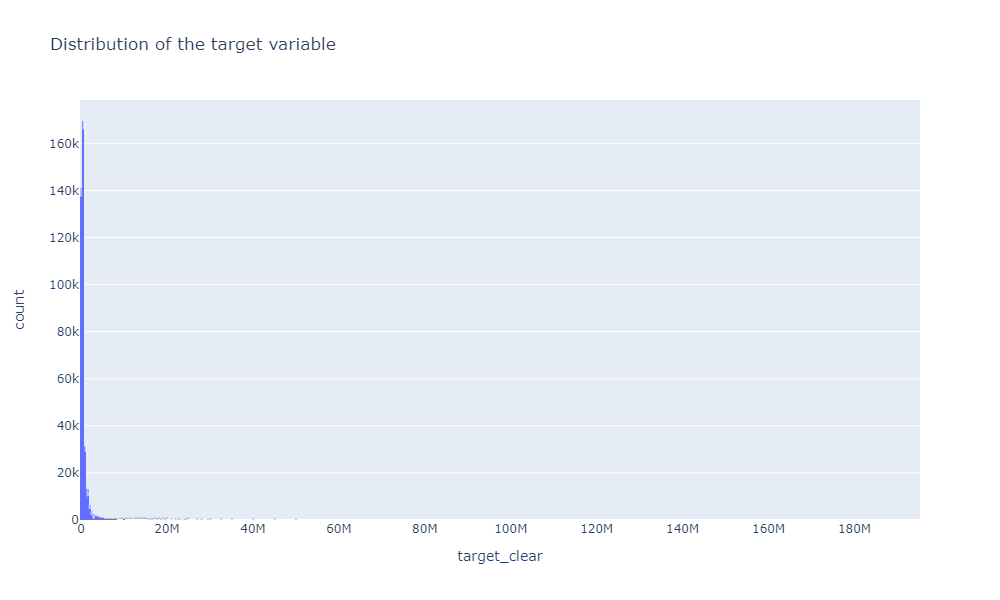

In [10]:
fig = px.histogram(
    data_frame=date_estate,
    x='target_clear',    
    title='Distribution of the target variable',
    text_auto=True,    
    height=600,    
    width=1000,
    nbins=400           
)
fig.show()

Распределение целевой переменной не дало понимания общей картины из-за большого диапазона цен и выбросов. Создадим новый признак на основе целевого - target_clear_log - логарифмируя целевой, приведя исходное распределение к подобию нормального для удобства.

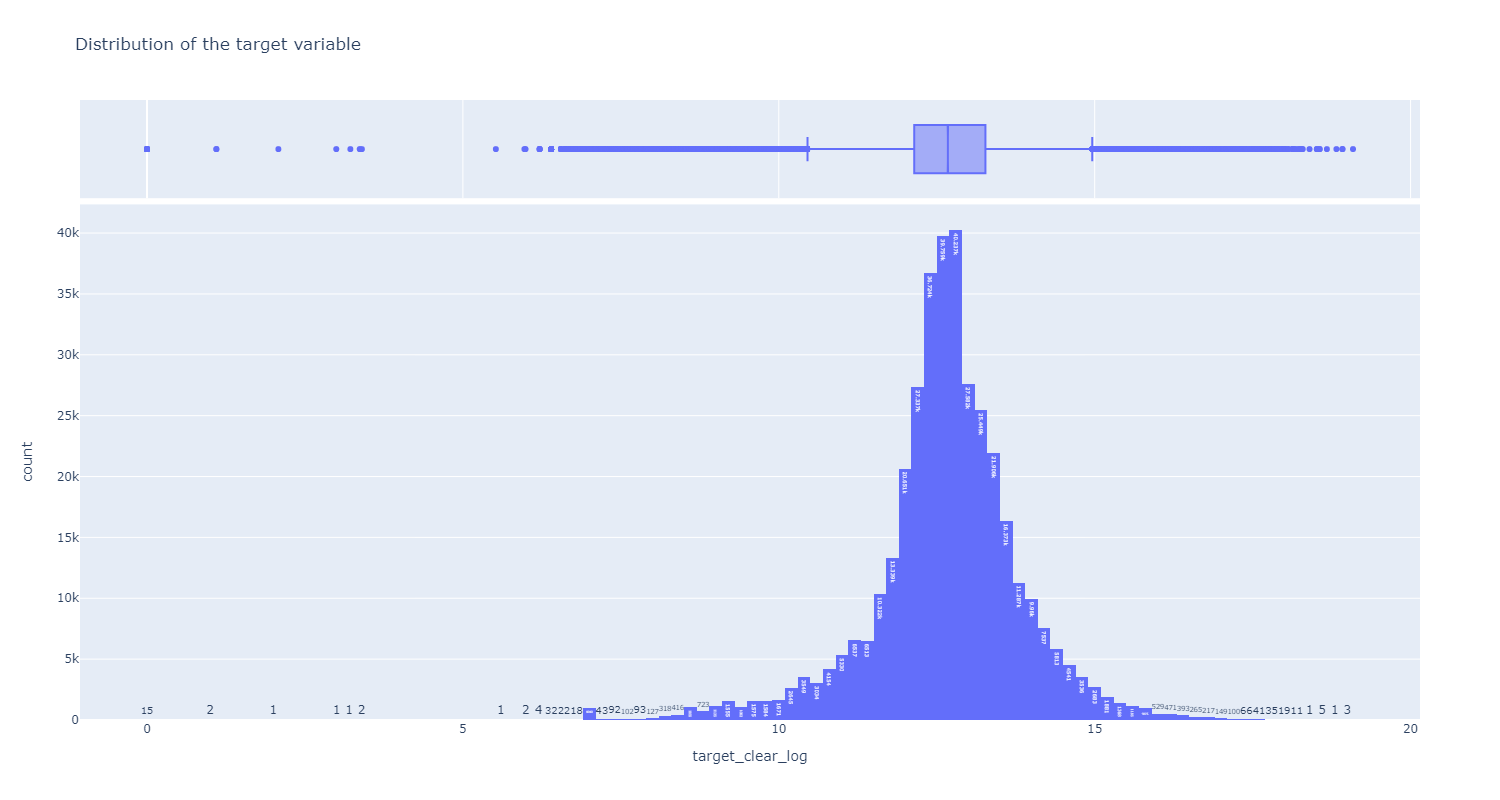

In [11]:
date_estate['target_clear_log'] = np.log(date_estate['target_clear'])

fig = px.histogram(
    data_frame=date_estate,
    x='target_clear_log',    
    title='Distribution of the target variable',
    text_auto=True,    
    height=800,    
    width=1500, 
    nbins=100,
    marginal='box'   
)
fig.show()

Избавимся от выбросов по целевому признаку, для этого воспользуемся методом Тьюки, применив его к логарифмированному признаку:

In [12]:
def outliers_iqr(data, feature):
    """ избавление признака от выбросов по методу Тьюки(межквартильный размах)

    Args:
        data (DateFrame): датафрейм
        feature (Series): признак в датафрейме для обработки

    Returns:
        DateFrame: возвращает два датафрейма - outliers с выбросами и cleaned очищенный датасет
    """
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)].reset_index()
    cleaned = cleaned.drop([feature, 'index'], axis=1)
    return outliers, cleaned

outliers, date_estate = outliers_iqr(date_estate, 'target_clear_log')

In [11]:
# если необходимо узнать тип ассиметрии
# print(date_estate['target_clear_log'].skew())

In [13]:
print(f'Число наблюдений {date_estate.shape[0]}.')
date_estate['target_clear'].describe()

Число наблюдений 350171.


count    3.501710e+05
mean     4.812874e+05
std      4.762286e+05
min      3.470000e+04
25%      2.000000e+05
50%      3.275000e+05
75%      5.690000e+05
max      3.145000e+06
Name: target_clear, dtype: float64

In [14]:
date_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350171 entries, 0 to 350170
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        311695 non-null  object 
 1   private pool  4014 non-null    object 
 2   propertyType  320182 non-null  object 
 3   street        350169 non-null  object 
 4   baths         259357 non-null  object 
 5   homeFacts     350171 non-null  object 
 6   fireplace     98756 non-null   object 
 7   city          350151 non-null  object 
 8   schools       350171 non-null  object 
 9   sqft          319522 non-null  object 
 10  zipcode       350171 non-null  object 
 11  beds          274443 non-null  object 
 12  state         350171 non-null  object 
 13  stories       218883 non-null  object 
 14  mls-id        24225 non-null   object 
 15  PrivatePool   37142 non-null   object 
 16  MlsId         285980 non-null  object 
 17  target_clear  350171 non-null  float64
dtypes: f

После очистки датасета число наблюдений уменьшилось до 350171, ушли аномальные значения в виде $1 или $195 млн. 

### **неинформативные признаки**

Обратим внимание на признаки наличия частного бассейна - private pool и PrivatePool, а также fireplace - в них порядка 70-90% пропусков и они кандидаты на удаление, как и признаки MlsId и mls-id, которые являются уникальными номерами в базе данных в системе множественного листинга и никакой информативности не несут.

In [15]:
def date_clear(df, no_inf_1, no_inf_2):
    """ Удаляет столбцы, в которых доля пропущенных значений > 60%,
    а также неинформативные признаки

    Args:
        df (DateFrame): исходный датафрейм
        no_inf_1 (Series): первый неинформативный признак
        no_inf_2 (Series): второй неинформативный признак

    Returns:
        DateFrame: очищенный датафрейм
    """
    df = df.drop([no_inf_1, no_inf_2], axis=1)
    #задаем минимальный порог: вычисляем 60% от числа строк
    thresh = df.shape[0]*0.6
    #удаляем столбцы, в которых более 30% (100-70) пропусков
    df = df.dropna(thresh=thresh, axis=1)
    return df

date_estate = date_clear(date_estate, 'mls-id', 'MlsId')

### **status(статус продажи), propertyType(тип недвижимости), street(улица)**

В признаках статус продажи(status), тип недвижимости(propertyType) и улица(street) заполним пропуски самым распространённым значением - for sale, single-family home и Address Not Disclosed соответственно:

In [16]:
date_estate['status'].describe()

count       311695
unique         157
top       for sale
freq        145296
Name: status, dtype: object

In [17]:
date_estate['status'] = date_estate['status'].fillna(date_estate['status'].describe().top)

In [18]:
date_estate['propertyType'].describe()

count                 320182
unique                  1252
top       single-family home
freq                   88277
Name: propertyType, dtype: object

In [19]:
date_estate['propertyType'] = date_estate['propertyType'].fillna(date_estate['propertyType'].describe().top)

In [20]:
date_estate['street'].describe()

count                    350169
unique                   312461
top       Address Not Disclosed
freq                        649
Name: street, dtype: object

In [21]:
date_estate['street'] = date_estate['street'].fillna(date_estate['street'].describe().top)

Для удобства работы переведём данные в признаках статус продажи(status), тип недвижимости(propertyType), улицу(street) в нижний регистр:

In [22]:
date_estate['status'] = date_estate['status'].apply(lambda x: x.lower())
date_estate['propertyType'] = date_estate['propertyType'].apply(lambda x: x.lower())
date_estate['street'] = date_estate['street'].apply(lambda x: x.lower())

Если вглянуть на статусы, то основная часть покрывается статусами:
- for sale(продаётся)
- active(активное)
- foreclosure(обращение взыскания)
- new construction()
- pending(в ожидании)

Оставим данные статусы, остальные переименуем в категорию other(другие).

In [23]:
date_estate['status'].value_counts()[:5]

for sale            225466
active               94759
foreclosure           5554
new construction      5325
pending               4385
Name: status, dtype: int64

In [24]:
# лист с категориями
status_list = list(date_estate['status'].value_counts()[:5].index)
date_estate['status'] = date_estate['status'].apply(lambda x: x if x in status_list else 'other')

Аналогично посмотрим на тип недвижимости(propertyType):

- single family(дом на одну семью)
- condo(кондоминиум)
- land(земля)
- townhouse(таунхаус)
- multi family(для многодетной семьи/большой семьи)
- high rise(в выстоном здании)
- ranch(ранчо)
- coop(кооперативные квартиры/дома)
- single detached(отдельно стоящий дом)
- traditional(стандартное)

Всё, что не попадает в вышеуказанные категории будут заменены на other.

In [25]:
date_estate['propertyType'].value_counts()[:20]

single-family home               118266
single family                     60844
condo                             40762
single family home                31026
townhouse                         18036
lot/land                          14610
condo/townhome/row home/co-op      7614
multi-family                       7321
land                               6074
traditional                        5846
coop                               3073
multi family                       2628
ranch                              1762
high rise                          1724
detached, one story                1597
single detached, traditional       1569
contemporary                       1533
mobile/manufactured                1357
multi-family home                  1354
1 story                            1234
Name: propertyType, dtype: int64

In [26]:
# проводим удаление(замену) ненужных символов 
date_estate['propertyType'] = date_estate['propertyType'].apply(lambda x: ' '.join(x.replace('-', ' ').replace(',', ' ').replace('/', ' ').split(' ')[0:2]))
date_estate['propertyType'] = date_estate['propertyType'].replace('condo townhome', 'condo').replace('lot land', 'land').replace('detached ', 'single detached')
# лист с категориями
propertyType_list = list(date_estate['propertyType'].value_counts()[:11].index)
# удаляем одну неинформационную категорию 
propertyType_list.remove('1 story')
date_estate['propertyType'] = date_estate['propertyType'].apply(lambda x: x if x in propertyType_list else 'other')

Преобразуем признак улица(street), избавившись от номеров домов и оставив только наименование улиц - подразумевая, что стоимость недвижимость привязана к локации, а наименование улицы один из способов привязаться к этому местоположению(району города). Далее те улицы, которые будут в единственном экземпляре объединим в категорию other.

In [27]:
date_estate['street'] = date_estate['street'].replace('undisclosed address', 'address not disclosed').replace('(undisclosed address)', 'address not disclosed')\
    .replace('address not available', 'address not disclosed').replace('unknown address', 'address not disclosed')
    
date_estate['street_new'] = date_estate['street'].apply(lambda x: ' '.join(x.split(' ')[1:4])).replace('', 'address not disclosed').replace('address not disclosed', 'not disclosed')

date_estate = date_estate.drop(['street'], axis=1)

In [28]:
street_list = list(date_estate['street_new'].value_counts()[date_estate['street_new'].value_counts()==1].index)
date_street_one = date_estate[date_estate['street_new'].isin(street_list)]
date_street_one['street_new'] = date_street_one['street_new'].apply(lambda x: 'other')
date_estate = pd.concat(
    [date_estate[~date_estate['street_new'].isin(street_list)], date_street_one],
    ignore_index=True,
    axis=0
)

C:\Users\836D~1\AppData\Local\Temp/ipykernel_10084/3507538571.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **city(город)**

Следующий признак - город(city), в котором имеются 20 пропущенных значений:

In [29]:
date_estate['city'].isnull().sum()

20

Спарсим данные по городам/штатам/округам/zip-code, например, с сайта http://amerikos.com/geo/?pageNumber=1&pageLimit=120, ниже приведён код парсера, мы же загрузим уже готовые данные - файл содержит следующие признаки: Город, Штат, Округ, Индекс, Телефонный код, Часовой пояс, Широта, Долгота.

In [30]:
def get_city_inf():
    """ Парсит сайт http://amerikos.com/geo/?pageNumber=1&pageLimit=120 
    с данными по городам/штатам/округам/zip-code

    Returns:
        DateFrame: спарсенные данные с сайта упакованные в датафрейм """
    
    # начинаем парсить с первой страницы
    page = 1
    # адрес сайта, в котором будет меняться переменная pageNumber
    url = f'http://amerikos.com/geo/?pageNumber={page}&pageLimit=120'
    # вывод информации о номере страницы
    print(f'Парсим {page} страницу')
    # считываем инфо со страницы - тип данных - лист, в котором необходим элемент 2
    df = pd.read_html(url)[2]
    # временный датафрейм
    df_temp = df    
    # запускаем цикл останавливающийся по условию
    while df_temp['Город'].iloc[0] != 'Не удалось найти города.':
        # увеличиваем счётчик страниц
        page += 1
        # выводим информацию на какой странице находимся
        print(f'Парсим {page} страницу')
        # обновляем адрес страницы
        url = f'http://amerikos.com/geo/?pageNumber={page}&pageLimit=120' 
        # данные записываем во временный датафрейм      
        df_temp = pd.read_html(url)[2]
        # производим объединение датафреймов(основоного и временного) построчно
        df = pd.concat(
            [df, df_temp],
            ignore_index=True,
            axis=0
        )
    # удаляем последнюю неинформативную строку    
    df = df.drop(axis=0, index=(df.shape[0]-1))
    return df

In [31]:
df = pd.read_csv('df_pars.csv',index_col=False)
df_pars = df.copy().drop('Unnamed: 0', axis=1)
df_pars.head()

,Город,Штат,Округ,Индекс,Телефонный код,Часовой пояс,Широта,Долгота
0,65th Infantry,PR,San Juan,923,787,EST+1,18.4125,-66.0374
1,Aaronsburg,PA,Centre,16820,814,EST,40.8639,-77.3918
2,Abbeville,GA,Wilcox,31001,229,EST,31.9896,-83.3111
3,Abbeville,MS,Lafayette,38601,662,CST,34.4719,-89.5985
4,Abbeville,AL,Henry,36310,334,CST,31.5550,-85.2655


Нас будут интересовать только столбцы - Город, Округ, Индекс, Широта и Долгота, остальные удалим. Далее соединим два файла по признаку индекс(zipcode). Обратим внимание на присутствие в признаке индекс(zipcode) значение с пропуском '--':

In [32]:
df_pars = df_pars[['Город', 'Округ', 'Индекс', 'Широта', 'Долгота']]

date_estate['zipcode'] = date_estate['zipcode'].apply(lambda x: str(0) if x== '--' else x)
date_estate['zipcode'] = date_estate['zipcode'].apply(lambda x: int(x) if len(x.split('-')) < 2  else int(x.split('-')[0]))
# объединяем
date_estate = date_estate.merge(
    df_pars,
    left_on='zipcode',
    right_on='Индекс',    
    how='left'
)

date_estate['city'] = date_estate.apply(lambda x: x.Город if x.city is np.nan else x.city, axis=1)
date_estate['city'] = date_estate['city'].apply(lambda x: date_estate['city'].describe().top if (x=='--') | (x==' ') else x)
# удаляем ненужные столбцы, переименовываем новые
date_estate = (date_estate.drop(['Город', 'Индекс'], axis=1)).rename(columns={'Округ':'county', 'Широта':'latitude', 'Долгота':'longitude'})

In [33]:
date_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350171 entries, 0 to 350170
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        350171 non-null  object 
 1   propertyType  350171 non-null  object 
 2   baths         259357 non-null  object 
 3   homeFacts     350171 non-null  object 
 4   city          350171 non-null  object 
 5   schools       350171 non-null  object 
 6   sqft          319522 non-null  object 
 7   zipcode       350171 non-null  int64  
 8   beds          274443 non-null  object 
 9   state         350171 non-null  object 
 10  stories       218883 non-null  object 
 11  target_clear  350171 non-null  float64
 12  street_new    350171 non-null  object 
 13  county        345994 non-null  object 
 14  latitude      345994 non-null  float64
 15  longitude     345994 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 45.4+ MB


Обработаем пропуски в признаках долгота(longitude) и ширина(latitude) заменив их на среднее значение. В признаке округ(county) пропуски заполним частовстречающимся значением:

In [34]:
date_estate['longitude'] = date_estate['longitude'].fillna(date_estate['longitude'].mean())
date_estate['latitude'] = date_estate['latitude'].fillna(date_estate['latitude'].mean())
date_estate['county'] = date_estate['county'].fillna(date_estate['county'].describe().top)

### **baths(число ванных комнат)**

Займёмся признаком число ваных(baths) - данный признак содержит разные строковые значения и символы, которые требуют обработки, также имеется в числовых значениях(представленых в виде строкового) имеется символ ',' вместо точки, его необходимо заменить на точку для корректного преобразования в числовой формат(float). Пропущенные значения заменим на медианное.

In [35]:
def handler_baths(df):
    """ Обработчик признака baths

    Args:
        df (DateFrame): входящий датафрейм

    Returns:
        DateFrame: обработанный датафрейм
    """
    # проверяем на пропущенное значение
    if df  is not np.nan:
        # производим замену симвволов, производим сплит, преобразуем в лист
        df = df.replace(',', '.').split(' ')
        # проходим по каждому элементу листа
        for i in df:
            try:
                i = float(i)
                return i
            # обрабатываем исключение - если элемент невозможно преобразовать в float, то пропускаем
            except ValueError:
                continue  
    else:
        return df
    
date_estate['baths'] = date_estate['baths'].apply(handler_baths)
date_estate['baths'] = date_estate['baths'].fillna(date_estate['baths'].median())

После преобразования имеем:

In [36]:
date_estate['baths'].describe()

count    350171.000000
mean          3.052768
std          19.389438
min           0.000000
25%           2.000000
50%           2.250000
75%           3.000000
max         750.000000
Name: baths, dtype: float64

Сразу смущает максимальные значения в 750, скорее всего это выбросы, которые будут сбивать модель, избавимся от них ограничив размер 20. Нулевые значения оставляем, так как в датафрейме имеются тип недвижимости земля(land), что вполне объясняет нулевые значения.

In [37]:
date_estate = date_estate[date_estate['baths'] < 21].reset_index().drop(['index'], axis=1)

In [38]:
date_estate.shape

(349905, 16)

### **sqft(квадратный фунт)**

Возьмёмся за признак **квадратный фут(sqft)** - напишем функцию-обработчик, обратим внимание, что в значениях имеются записи в формате: '--', '2500 sqft', '-- sqft', 'Total interior livable area: 2,533 sqft', а также пропущенные значения, которые заменим на медианное.

In [39]:
date_estate['sqft'].value_counts()[:20]

0             6915
1,200 sqft     793
1,000 sqft     625
1,100 sqft     552
1,800 sqft     547
1,500 sqft     534
2,000 sqft     505
1,400 sqft     501
--             477
1,600 sqft     438
800 sqft       433
1,300 sqft     396
900 sqft       388
1,440 sqft     361
2,400 sqft     359
1,200          352
2,200 sqft     346
960 sqft       329
3,000 sqft     327
2,100 sqft     318
Name: sqft, dtype: int64

In [40]:
def handler_sqft(df):
    """ Обрабатывает признак sqft

    Args:
        df (Series): необработанный признак

    Returns:
        float or np.nan: обработанный признак
    """
    if df is np.nan or df=='--' or df.replace(',', '').split(' ')[0]=='--':
        return np.nan
    if df.replace(',', '').split(' ')[0].lower()=='total':
        df = float(df.replace(',', '').split(' ')[-2])
    else:
        df = float(df.replace(',', '').split(' ')[0])        
    return df

date_estate['sqft_new'] = date_estate['sqft'].apply(handler_sqft)
date_estate['sqft_new'] = date_estate['sqft_new'].fillna(date_estate['sqft_new'].median())
date_estate = date_estate.drop(['sqft'], axis=1)

### **stories(число этажей)**

Следующий признак - **число этажей(stories)** - в нём данные представлены в строковом формате, некоторые признаки прописаны словами, так, например, первый этаж может быть прописан 'One', 'One,' '1 Story', '1.0', есть пропущенные значения, спец. символы, например, '+', записи не содержащие никакие отсылки к этажности(неинформативные) - их заменим на медианное значение.

In [41]:
date_estate['stories'].value_counts()[:20]

1.0        65737
2.0        53171
1          22744
2          17584
3.0        10631
0.0         6897
One         5738
0           4089
3           3998
9.0         2809
2.00        2651
Two         2448
4.0         1971
2 Story     1959
1 Story     1246
1.00        1179
3+           840
4            833
6.0          684
1.50         604
Name: stories, dtype: int64

In [42]:
def handler_stories(df):
    """ Обработчик признака stories

    Args:
        df (Series): необработанный признак

    Returns:
        float/np.nan: обработанный признак
    """
    # словарь для замены номеров этажей
    stories_dict = {'One':1, 'Two':2, 'Three':3, 'Tri-Level':3, 'One,':1, '1-2':1.5, 'Bi-Level':2, '3-4':3.5, 'Two,':2, 'Tri':3}
    
    if df is not np.nan:
        df = df.replace('+', '').split(' ')[0]
        if df in stories_dict.keys():
            df = stories_dict[df]
            try:
                df = float(df)
                return df
            except ValueError:
                df = np.nan
                return df
        else:
            try:
                df = float(df)
                return df
            except ValueError:
                df = np.nan
                return df
    else:
        return df
    
date_estate['stories_new'] = date_estate['stories'].apply(handler_stories)
date_estate = date_estate.drop(['stories'], axis=1)

Обратим внимание на два объекта с этажностью значением более 100, явно это выбросы от которых необходимо избавиться:

In [43]:
date_estate[date_estate['stories_new'] > 100]

,status,propertyType,baths,homeFacts,city,schools,zipcode,beds,state,target_clear,street_new,county,latitude,longitude,sqft_new,stories_new
156065,for sale,condo,1.0,"{'atAGlanceFacts': [{'factValue': '1949', 'factLabel': 'Year built'}, {'factValue': '1980', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '25 sqft lot', 'factLabel': 'lotsize'}, {'factValue': '$125', 'factLabel': 'Price/sqft'}]}",Jacksonville,"[{'rating': ['4/10', '3/10'], 'data': {'Distance': ['0.7 mi', '4.4 mi'], 'Grades': ['PK-8', '9-12']}, 'name': ['John E. Ford K-8 School', 'William M. Raines High School']}]",32202,-- bd,FL,53000.0,w ashley st,Duval,30.328400,-81.651900,425.0,1120.0
336117,for sale,townhouse,3.0,"{'atAGlanceFacts': [{'factValue': '2006', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': '1 space', 'factLabel': 'Parking'}, {'factValue': '2,613 sqft lot', 'factLabel': 'lotsize'}, {'factValue': '$217', 'factLabel': 'Price/sqft'}]}",Bend,"[{'rating': ['7/10', '3/10', '7/10'], 'data': {'Distance': ['2 mi', '2.1 mi', '3 mi'], 'Grades': ['K-5', '6-8', '9-12']}, 'name': ['Lava Ridge Elementary School', 'Sky View Middle School', 'Mountain View Senior High School']}]",97703,3 bd,OR,325000.0,other,Miami-Dade,33.550405,-90.626576,1497.0,1002.0


In [44]:
date_estate['stories_new'] = date_estate['stories_new'].fillna(date_estate['stories_new'].median())
date_estate = date_estate[date_estate['stories_new'] < 100].reset_index().drop(['index'], axis=1)
date_estate['stories_new'].describe()

count    349903.000000
mean          1.525794
std           1.960435
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          91.000000
Name: stories_new, dtype: float64

### **beds(число комнат)**

In [45]:
def handler_beds(df):
    """ Обработчик признака beds

    Args:
        df (Series): необработанный признак

    Returns:
        float/np.nan: обработанный признак
        """
    beds_list = list(range(0,16))
    if df is not np.nan:
        try:
            df = float(df.replace(',', '.').split(' ')[0])
            if df in beds_list:
                return df
            else:
                return np.nan  
        except ValueError:
            return np.nan    
    else:
        return df
    
date_estate['beds_new'] = date_estate['beds'].apply(handler_beds)      
date_estate = date_estate.drop(['beds'], axis=1)
date_estate['beds_new'] = date_estate['beds_new'].fillna(date_estate['beds_new'].median())    

### **Сведения о доме(homeFacts)**

Займёмся признаком сведения о доме(homeFacts) - в котором намешано много информации и она представлена в строковом формате, который в свою очередь похож на json-формат(данные хранятся в виде словарей и списков). Внимательно взглянем на информацию, содержащуюся в данном признаке:

- atAGlanceFacts(факты) - основной ключ, значениями которого является список словарей

В каждом словаре находятся два ключа -**factLabel**(наименование параметра/факта) и **factValue**(значение параметра). 

Имеем следующие виды фактов(factValue):

- Year built(год постройки дома)
- Remodeled year(год реконструкции)
- Heating(отопление)
- Cooling(охлаждение)
- Parking(паркинг)
- lotsize(дом с участком)
- Price/sqft(цена за квадратный фунт)

Задача - разнести все параметры по отдельным признакам, далее преобразовать их, избавиться от выбросов.

In [46]:
# преобразование строки в словарь
date_estate['homeFacts_new'] = date_estate['homeFacts'].apply(lambda x: ast.literal_eval(x))
# создание новых признаков
date_estate['year_built'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][0]['factValue'])
date_estate['remodeled_year'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][1]['factValue'])
date_estate['heating'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][2]['factValue'])
date_estate['cooling'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][3]['factValue'])
date_estate['parking'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][4]['factValue'])
date_estate['lotsize'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][5]['factValue'])
date_estate['price_sqft'] = date_estate['homeFacts_new'].apply(lambda x: x['atAGlanceFacts'][6]['factValue'])
# удаление первначального признака
date_estate = date_estate.drop(['homeFacts'], axis=1)

#### **year_built(год постройки дома)**

Взглянем на year_built:

In [47]:
date_estate['year_built'].isnull().sum()

3135

In [48]:
date_estate['year_built'].value_counts()[:20]

        44584
2019    31378
2006     7839
2005     7321
2007     6944
2018     6453
2004     5361
2017     4942
2016     4791
2008     4755
2003     4416
1950     4372
2002     4124
2001     4065
1920     4037
1925     3898
2015     3683
1955     3594
1960     3581
2000     3495
Name: year_built, dtype: int64

имеем 3135(+44584) незаполненных значений. Преобразуем признак в числовой формат и заполним пропуски медианным значением. Также заменим на медианные значения дома года постройки > 2023 года и раньше 1700 года.

In [49]:
date_estate['year_built'] = date_estate['year_built'].apply(lambda x: np.nan if x == '' else np.nan if x == 'No Data' else np.nan if x is None else x)
date_estate['year_built'] = date_estate['year_built'].apply(lambda x: int(x) if x is not np.nan else x)
date_estate['year_built'] = date_estate['year_built'].fillna(date_estate['year_built'].median())
date_estate['year_built'] = date_estate['year_built'].apply(lambda x: date_estate['year_built'].median() if x > 2023 else date_estate['year_built'].median() if x < 1700 else x)

In [50]:
date_estate['year_built'].describe()

count    349903.000000
mean       1980.568726
std          30.738748
min        1700.000000
25%        1962.000000
50%        1985.000000
75%        2005.000000
max        2022.000000
Name: year_built, dtype: float64

Вместо года постройки создадим новый признак - возраст дома(age_home) - разницой текущего года и года постройки дома.

In [51]:
# текущий год
year_current = datetime.datetime.now().year
date_estate['age'] = year_current - date_estate['year_built']

### **remodeled_year(год реконструции)**

In [52]:
date_estate['remodeled_year'].isnull().sum()

25096

In [53]:
date_estate['remodeled_year'] = date_estate['remodeled_year'].apply(lambda x: np.nan if (x == '') | (x == None) else x)
date_estate['remodeled_year'] = date_estate['remodeled_year'].apply(lambda x: int(x) if x is not np.nan else x)

In [54]:
date_estate['remodeled_year'].describe()

count    146094.000000
mean       1979.461757
std          84.323945
min           0.000000
25%        1968.000000
50%        1986.000000
75%        2004.000000
max        2021.000000
Name: remodeled_year, dtype: float64

В признаке 25096 пропуска, заменим их на медианное значение - 1986:

In [55]:
date_estate['remodeled_year'] = date_estate['remodeled_year'].fillna(date_estate['remodeled_year'].median())

Сразу стоит проверить - дата реконструции не может быть раньше(либо равно) даты постройки, поэтому все значения в признаке remodeled_year, которые не будут соответствовать этому условию заменим на нули.

In [56]:
date_estate['remodeled_year'] = date_estate.apply(lambda x: 0 if x.remodeled_year <= x.year_built else x.remodeled_year, axis=1)

Также создадим признак на основе remodeled_year - число лет, прошедших с реконструкции(age_remodeled). Обратим внимание, что если в признаке remodeled_year имеется 0, то тогда время реставрации считается с даты постройки дома:

In [57]:
date_estate['age_remodeled'] = date_estate.apply(lambda x: (year_current - x.remodeled_year) if x.remodeled_year != 0 else (year_current - x.year_built), axis=1)

После этого можем удалить признаки year_built и remodeled_year.

In [58]:
date_estate = date_estate.drop(['year_built', 'remodeled_year'], axis=1)

### **heating(отопление)**

In [59]:
date_estate['heating'].isnull().sum()

3135

В признаке 93105 пропущенных значений, так как значения текстовые, то приведём их для удобства в нижний регистр:

In [60]:
date_estate['heating'] = date_estate['heating'].apply(lambda x: x.lower() if (type(x) is not float) and (x is not None) else x)
date_estate['heating'] = date_estate['heating'].apply(lambda x: np.nan if (x is None) | (x == 'none') | (x == '') else x)

Избавимся от ненужных символов, возьмём только первые два элемента:

In [61]:
date_estate['heating'] = date_estate['heating'].apply(lambda x: x.replace(',', '') if type(x) is not float else x)
date_estate['heating'] = date_estate['heating'].apply(lambda x: x if (x is np.nan) | (type(x) is float) else ' '.join(x.split(' ')[:2]))

Вглянем на первые 50 самых распространённых значения:

In [62]:
date_estate['heating'].value_counts()[:51]

forced air               134103
other                     28611
central electric          13737
central air                9730
heat pump                  8920
electric                   8901
gas                        8804
no data                    8242
central                    6198
baseboard                  3735
electric heat              3391
wall                       3217
heating system             2673
natural gas                1590
radiant                    1412
 gas                       1286
central gas                1175
central furnace             909
central heating             822
gas heat                    788
 heat                       546
electric gas                364
central heat                323
refrigeration ceiling       287
refrigeration               254
oil                         213
heat pump(s)                206
baseboard forced            193
baseboard hot               186
gas hot                     178
 electric                   154
hot wate

Унифицируем данные, произведя необходимые замены, далее отберём первые 9 популярных значений, а остальные заменим на other. Пропущенные значения заменим самой распространённой категорией.

In [63]:
date_estate['heating'] = date_estate['heating'].replace('central electric', 'electric').replace(' electric', 'electric').replace('no data', np.nan).replace('electric heat', 'electric')\
    .replace('natural gas', 'gas').replace(' gas', 'gas').replace('central gas', 'gas').replace('gas heat', 'gas').replace('electric gas', 'gas').replace('gas hot', 'gas')\
        .replace('gas -', 'gas').replace('propane', 'gas').replace(' heat', 'heat pump').replace('heating system', 'central').replace('central furnace', 'central')\
            .replace('central heating', 'central').replace('central heat', 'central').replace('heat pump(s)', 'heat pump').replace('radiant', 'central').replace('baseboard forced', 'baseboard')\
                .replace('baseboard hot', 'baseboard')

In [64]:
# лист из топ 9 категорий
heating_list = list(date_estate['heating'].value_counts()[:9].index)

date_estate['heating'] = date_estate['heating'].apply(lambda x: x if x is np.nan else x if x in heating_list else 'other')
date_estate['heating'] = date_estate['heating'].fillna(date_estate['heating'].describe().top)

Итого получаем уменьшение категорий до 9:

- forced air(воздушное принудительное отопление)
- other(прочее)
- electric(электрическое)
- gas(газовое)
- central(центральное)
- central air(централье воздушное)
- heat pump(тепловые насосы)
- baseboard(тёплый пол)
- wall(тепловая стена)

In [65]:
date_estate['heating'].value_counts()

forced air     235341
other           34972
electric        26183
gas             14337
central         12337
central air      9730
heat pump        9672
baseboard        4114
wall             3217
Name: heating, dtype: int64

### **cooling(охлаждение)**

В признаке типа охлаждения имеем 3135 пропуска:

In [66]:
date_estate['cooling'].isnull().sum()

3135

In [67]:
date_estate['cooling'] = date_estate['cooling'].apply(lambda x: x.lower() if (x is not np.nan) & (x is not None) else x)
date_estate['cooling'] = date_estate['cooling'].apply(lambda x: np.nan if (x is None) | (x == 'none') | (x == '') else x)

In [68]:
date_estate['cooling'].value_counts()[:40]

central                                              153547
central air                                           14263
no data                                               10257
has cooling                                            9280
central electric                                       6115
wall                                                   3921
central gas                                            3547
central heating                                        2800
cooling system                                         2665
central a/c                                            1908
other                                                  1729
central a/c (electric), central heat (gas)             1579
central a/c (electric), central heat (electric)        1350
refrigeration                                          1073
central, electric                                      1060
evaporative                                            1008
electric                                

Произведём преобразование записей и разделим на категории:

In [69]:
date_estate['cooling'] = date_estate['cooling'].replace('no data', np.nan).replace('none', np.nan)
date_estate['cooling'] = date_estate['cooling'].apply(lambda x: x if x is np.nan else ' '.join(x.split(' ')[:2]))
date_estate['cooling'] = date_estate['cooling'].apply(lambda x: x.replace(',', '') if type(x) is not float else x)
date_estate['cooling'] = date_estate['cooling'].replace('has cooling', 'cooling').replace('central a/c', 'central air')

Все значения, которые не войдут в топ-10 категорий обозначим как other, а пропущенные значение заменим самым распространённым значением.

In [70]:
# топ лист
cooling_list = list(date_estate['cooling'].value_counts()[:10].index)
date_estate['cooling'] = date_estate['cooling'].apply(lambda x: x if x is np.nan else x if x in cooling_list else 'other')
date_estate['cooling'] = date_estate['cooling'].fillna(date_estate['cooling'].describe().top)

Итого в cooling(охлаждение) имеем категории:

- central(центральное)
- central air(центральное воздушное)
- other(прочее)
- cooling(охлаждение)
- central electric(центральное электрическое)
- central gas(центральное газ)
- wall(настенный)
- central heating(центральное отопление/охлаждение)
- cooling system(системы охлаждения)
- refrigeration(охлаждение)

In [71]:
date_estate['cooling'].value_counts()

central             275408
central air          24125
other                17559
cooling               9280
central electric      8302
central gas           4252
wall                  3921
central heating       3318
cooling system        2665
refrigeration         1073
Name: cooling, dtype: int64

### **parking(паркинг)**

В признаке 3135(+152424) пропусков и очень много уникальных записей:

In [72]:
date_estate['parking'].isnull().sum()

3135

In [73]:
date_estate['parking'].value_counts()[:50]

                                    152424
Attached Garage                      68357
2 spaces                             27613
1 space                              13961
No Data                              12749
Detached Garage                      12456
Carport                               7544
3 spaces                              4504
Off Street                            3493
Carport, Attached Garage              2898
1                                     2849
4 spaces                              2718
2                                     2685
None                                  2236
Off street                            1582
On Street                             1211
Attached Garage, Detached Garage      1111
0                                      949
Attached Garage, Carport               944
Parking Desc                           875
Driveway                               688
6 spaces                               670
Detached Garage, Attached Garage       597
4          

Произведём преобразование признака и унификацию категорий, далее оставим топ-15, остальное обозначим как other, пропуски заполним топовым значением.

In [74]:
date_estate['parking'] = date_estate['parking'].apply(lambda x: x.lower() if (x is not np.nan) & (x is not None) else x)
date_estate['parking'] = date_estate['parking'].apply(lambda x: np.nan if (x is None) | (x == '') else x)
date_estate['parking'] = date_estate['parking'].replace('no data', np.nan).replace('none', np.nan)
date_estate['parking'] = date_estate['parking'].apply(lambda x: x if x is np.nan else x.replace('+', '').replace(',', '').split(' ')[0])
date_estate['parking'] = date_estate['parking'].replace('driveway', 'off').replace('garage', 'detached')
# топ лист
parking_list = list(date_estate['parking'].value_counts()[:15].index)

date_estate['parking'] = date_estate['parking'].apply(lambda x: x if x is np.nan else x if x in parking_list else 'other')
date_estate['parking'] = date_estate['parking'].fillna(date_estate['parking'].describe().top)

В признаке parking(паркинг) осталось 16 категорий:

- attached(пристроенный гараж)
- 0/1/2/3/4/5/6(количество мест)
- detached(отдельный гараж)
- carport(навес)
- off(место вне улицы)
- other(прочие)
- assigned(закреплённое место)
- parking(стоянка)
- electric(с электрическим приводом/воротами)

In [75]:
date_estate['parking'].value_counts()

attached    244379
2            31059
1            17063
detached     15408
carport      11518
off           9002
3             5054
other         4654
4             3309
on            2198
parking       2182
0              949
6              867
electric       821
assigned       725
5              715
Name: parking, dtype: int64

### **lotsize(дом с участком)**

In [76]:
date_estate['lotsize'].isnull().sum()

27020

In [77]:
date_estate['lotsize'].value_counts()[:20]

               31040
—              23044
No Data         5276
-- sqft lot     3701
0.26 acres      2235
0.28 acres      1917
0.25 acres      1876
0.27 acres      1826
0.29 acres      1720
0.34 acres      1489
6,098 sqft      1471
0.3 acres       1337
7,405 sqft      1329
6,534 sqft      1254
0.31 acres      1237
0.32 acres      1164
10,000 sqft     1154
5,000 sqft      1099
0.33 acres      1037
5,227 sqft      1016
Name: lotsize, dtype: int64

В признаке 27020(+31040)пропущенных значений, но на самом деле их больше так как имеются неявные пропуски в виде "—", "No Data", "-- sqft lot". Видим, что значения занесены в разных единицах измерения - акры(acres) и квадратные фунты(sqft) - переведём всё к одному виду - sqft. Обратим внимание, что где-то имеется разделитель в виде точки, а где-то в виде запятой. После обработки заменим пропущенные значения медианным.

In [79]:
def acr_change(acr):
    """ Переводит акры в квадратные фунты

    Args:
        acr (str): значение в акрах

    Returns:
        float: значение в квадратных фунтах
    """
    sqft = 43560 * float(acr)
    return sqft

def handler_lotsize(df):
    """ Обработчик признака lotsize

    Args:
        df (Series): необработанный признак

    Returns:
        float/str: обработанный признак
    """
    
    # заменяем пропуски на No и приводим разделитель к общему виду - точки
    df = df.replace('—', 'No').replace('No Data', 'No').replace('-- sqft lot', 'No').replace(',', '')
    
    if df != 'No':
        # приводим строку к нижнему регистру
        df = df.lower()
        # создаём лист со значениями 
        list_temp = df.split(' ')
        # если строка состоит из более чем одного значения, и второе значение 'acres' или 'acre', то переводим в кв фунты
        if (len(list_temp) > 1) and (df.split(' ')[1] == 'acres' or df.split(' ')[1] == 'acre'):
            df = acr_change(list_temp[0])
            return df
        else:
            df = float(list_temp[0])
            return df
    return df

In [80]:
# меняем все пропущенные значения для удобства на No
date_estate['lotsize'] = date_estate['lotsize'].apply(lambda x: 'No' if (x is np.nan) | (x is None) | (x == '') else x)  
# применяем функцию обработчик
date_estate['lotsize'] = date_estate['lotsize'].apply(handler_lotsize)
# все No меняем на np.nan, отрицательные значения на 0
date_estate['lotsize'] = date_estate['lotsize'].apply(lambda x: np.nan if x == 'No' else 0 if x < 0 else x)
# пропуски заменяем на медианное значение
date_estate['lotsize'] = date_estate['lotsize'].fillna(date_estate['lotsize'].describe().median())

### **price_sqft(цена за квадратный фунт)**

In [81]:
date_estate['price_sqft'].isnull().sum()

43414

In [82]:
date_estate['price_sqft'].value_counts()[:20]

             5010
No Data      1165
No Info       870
$125/sqft     797
$115/sqft     769
$132/sqft     768
$120/sqft     762
$119/sqft     762
$128/sqft     760
$122/sqft     756
$121/sqft     751
$130/sqft     748
$127/sqft     743
$117/sqft     742
$139/sqft     741
$123/sqft     738
$124/sqft     731
$135/sqft     729
$116/sqft     727
$136/sqft     724
Name: price_sqft, dtype: int64

В признаке имеется явный 43414(+5010) пропуск значений и не явный в виде записей 'No Data', 'No Info', которые заменим на np.nan.

In [83]:
date_estate['price_sqft'] = date_estate['price_sqft'].apply(lambda x: np.nan if (x == 'No Data') | (x == 'No Info') | (x is None) | (x == '') else x)
date_estate['price_sqft'] = date_estate['price_sqft'].apply(lambda x: x if x is np.nan else float(x.replace('$', '').replace('/', ' ').replace(',', '').split(' ')[0]))
# пропуски заменяем на медианное значение
date_estate['price_sqft'] = date_estate['price_sqft'].fillna(date_estate['price_sqft'].median())

После того как разобрались с блоком **homeFacts_new(сведения о доме)** данный признак можно удалить:

In [84]:
date_estate = date_estate.drop(['homeFacts_new'], axis=1)
date_estate = date_estate.rename(columns={'street_new':'street', 'sqft_new':'sqft', 'stories_new':'stories', 'beds_new':'beds'})

### **schools(школы)**

Признак schools(школы) по структуре похож на признак honeFacts(сведения о доме) - формат json файла с вложенными словарями и списками в списке содержатся следующие данные:

- rating(рейтинг школ)
- data, содержащий несколько сведений:
    - Distance(дистанции до школ, в милях)
    - Grades(уровень школы - младшая/средняя/старшая/и тд)
    - name(наименование школы)

Нас будет интересовать только rating(рейтинг школ) и Distance(дистанции до школ, в милях), остальные признаки упустим. Вначале преобразуем строковое значение в словварь и вытащим необходимые данные, на основе которых создадим два новых признака.

In [85]:
date_estate.iloc[1:2]

,status,propertyType,baths,city,schools,zipcode,state,target_clear,street,county,latitude,longitude,sqft,stories,beds,heating,cooling,parking,lotsize,price_sqft,age,age_remodeled
1,for sale,single family,3.0,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]",99216,WA,310000.0,e heroy ave,Spokane,47.6652,-117.215,1947.0,2.0,3.0,forced air,central,attached,5828.0,159.0,4.0,4.0


In [86]:
date_estate['rating'] = date_estate['schools'].apply(lambda x: ast.literal_eval(x)[0]['rating'])
date_estate['distance'] = date_estate['schools'].apply(lambda x: ast.literal_eval(x)[0]['data']['Distance'])
#date_estate['grades'] = date_estate['schools'].apply(lambda x: ast.literal_eval(x)[0]['data']['Grades'])
date_estate = date_estate.drop(['schools'], axis=1)

### **rating(рейтинг школ)**

Каждое значение признака rating(рейтинг школ) представлен в виде списка с рейтингами школ,, список может быть пустым либо содержать 'NR'(нет рейтинга), 'NA'(нет данных). Мы создадим обобщающий признак - среднее значение рейтинга школ в данном районе - rating_mean. 

In [87]:
date_estate['rating'].isnull().sum()

0

In [88]:
def handler_rating(df):
    """ Обработчик признака rating

    Args:
        df (Series): необработанный признак

    Returns:
        float/np.nan: обработанный признак
    """
    temp_list = []
    list_rating = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    
    if df == []:
        return np.nan
    else:
        for i in df:
            i = i.split('/')[0]
            if i in list_rating:
                temp_list.append(float(i))
        rating_mean = round(np.mean(temp_list), 2)
        return rating_mean   

In [89]:
date_estate['rating_mean'] = date_estate['rating'].apply(handler_rating)
date_estate['rating_mean'] = date_estate['rating_mean'].fillna(round(date_estate['rating_mean'].mean(), 2))
date_estate = date_estate.drop(['rating'], axis=1)                                                           

c:\anaconda_adm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.



### **disance(растояние до школ)**

В данном признаке, представленном в виде списка из расстояний до школ мы создадим два признака - среднее расстояние до школы(distance_mean) и количество школ на районе(schools_count).

In [90]:
date_estate['distance'].isnull().sum()

0

In [91]:
def handler_distance(df):
    """ Обработчик признака distance

    Args:
        df (Serise): необработанный признак

    Returns:
        list: обработанные признаки - средняя дистанция и количество школ
    """
    temp_list = []
    
    for i in df:
        i = i.split('mi')[0]
        temp_list.append(float(i))
    dist_mean = round(np.mean(temp_list), 2)
    schools_count = len(temp_list)
    return [dist_mean, schools_count]

In [92]:
date_estate['distance_mean'] = date_estate['distance'].apply(lambda x: handler_distance(x)[0])
date_estate['schools_count'] = date_estate['distance'].apply(lambda x: handler_distance(x)[1])
date_estate['schools_count'] = date_estate['schools_count'].apply(lambda x: date_estate['schools_count'].median() if x==0 else x)
date_estate['distance_mean'] = date_estate['distance_mean'].fillna(round(date_estate['distance_mean'].mean(), 2))                                                 
date_estate = date_estate.drop(['distance'], axis=1)

c:\anaconda_adm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

c:\anaconda_adm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.



Итак в очищенном датасете осталось 349903 наблюдения, взглянем ещё раз на целевую переменную, а далее попытаемся найти зависимости в признаках и сформировать гипотезы/выводы.

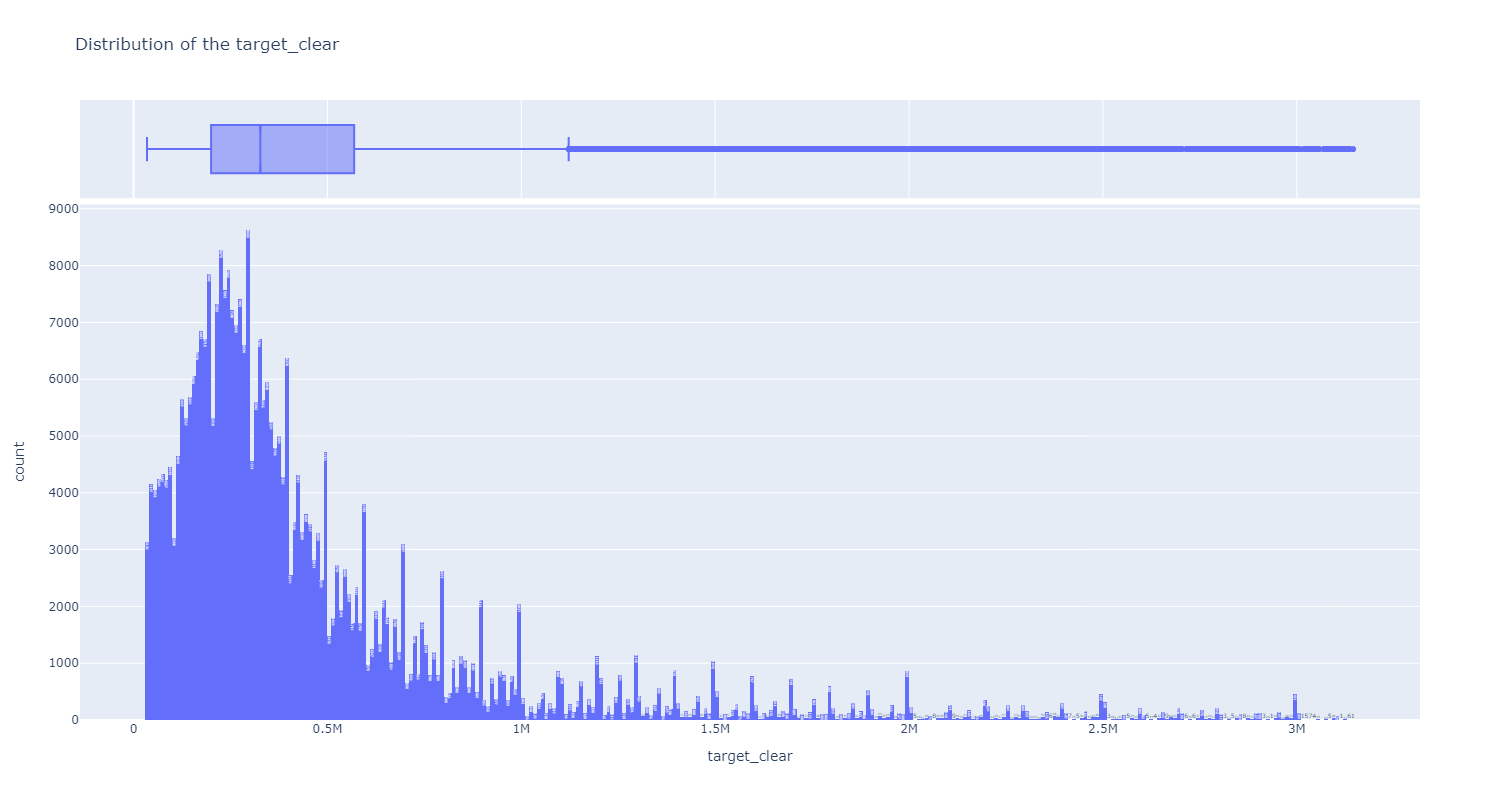

In [93]:
fig = px.histogram(
    data_frame=date_estate,
    x='target_clear',    
    title='Distribution of the target_clear',
    text_auto=True,    
    height=800,    
    width=1500,
    marginal='box'     
)
fig.show()

In [94]:
# ассиметрия 
print(date_estate['target_clear'].skew())

2.5120635431140017


Распределение целевой переменной стало иметь визуально читаемый вид, но признак ассиметричный - коэффициент ассиметрии положительный(2.51), что говорит о смещении вправо - на графике имеем длинный правый хвост - в котором имеются наблюдения с большим диапазоном разброса цен:

- Медианное значение увеличилось до $327018
- Среднее - $481141
- Минимальное - $34700
- Максимальное - $3145000

### **status - target_clear**

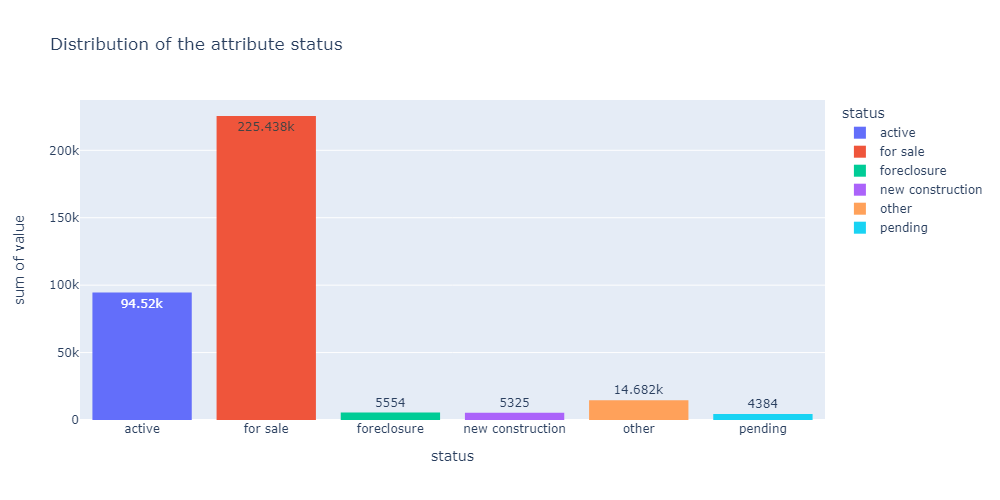

In [95]:
fig = px.histogram(
    data_frame=date_estate.groupby(['status'], as_index=False)['target_clear'].count(),
    x='status',
    y= ['target_clear'],
    color='status',
    height=500, 
    width=1000, 
    title='Distribution of the attribute status',
    text_auto=True   
)

fig.show()

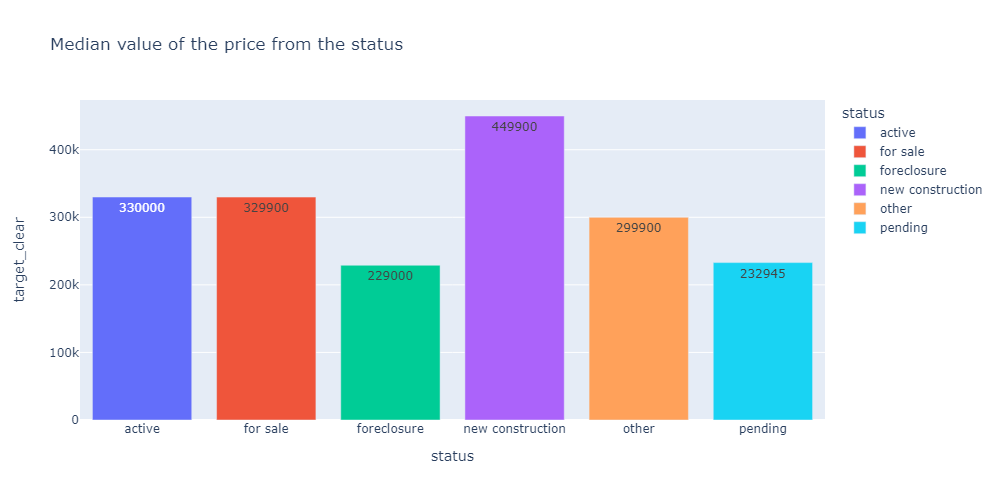

In [96]:
fig = px.bar(
    data_frame= date_estate.groupby(['status'], as_index=False)['target_clear'].median(),
    x='status',
    y='target_clear',
    color='status',
    text='target_clear', 
    orientation='v',
    title='Median value of the price from the status',
    height=500, 
    width=1000   
)

fig.show()

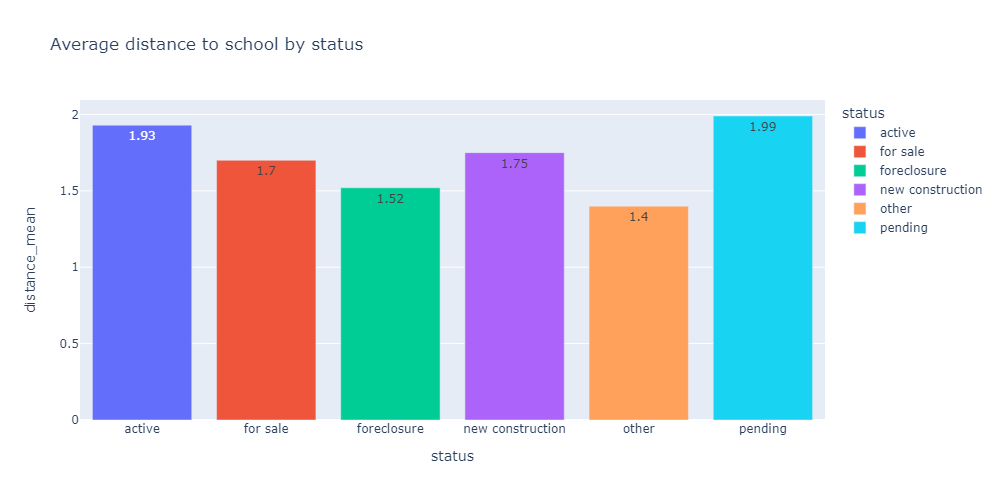

In [97]:
fig = px.bar(
    data_frame= date_estate.groupby(['status'], as_index=False)['distance_mean'].median(),
    x='status',
    y='distance_mean',
    color='status',
    text='distance_mean', 
    orientation='v',
    title='Average distance to school by status',
    height=500, 
    width=1000   
)

fig.show()

В данных основная масса объявлений это со статусом **for sale**(225466), наименьшая группа **pending**(4385). 

Медианная стоимость недвижимости в зависимости от статуса разнится - наибольшая зафиксирована в категории **new construction**(449900), что вполне объяснимо - новое, более современное жильё и строится в более перспективных районах города. Стоит отметить и категории **foreclosure** - недвижимость должников для продажи ниже рынка(229000) и категории **pending** - возможно недвижимость в непристижных районах/либо далеко от инфраструктцры/школ - на графике видно, что среднее расстояние до школы больше(1,99 мили).

Ниже преведены для подтверждения статистические тесты - так, например для статуса "active", видим, что нет статистической разницы между "active" и "for sale" - но с другими статусами разница имеется.

In [98]:
for_sale = date_estate[date_estate['status']=='for sale']['target_clear'].values
active = date_estate[date_estate['status']=='active']['target_clear'].values
foreclosure = date_estate[date_estate['status']=='foreclosure']['target_clear'].values
new_construction = date_estate[date_estate['status']=='new construction']['target_clear'].values
pending = date_estate[date_estate['status']=='pending']['target_clear'].values
other = date_estate[date_estate['status']=='other']['target_clear'].values

In [99]:
from scipy.stats import f_oneway

_, p = f_oneway(for_sale, active, foreclosure, new_construction, pending, other)

H0 = 'Нет значимой разницы между ценой недвижимости с разными статусами продажи'
H1 = 'Есть значимая разница между ценой недвижимости с разными статусами продажи'

alpha = 0.05

if p > alpha:
    print(f'{p} > {alpha} мы не можем отвергнуть нулевую гипотезу. {H0}')
else:
    print(f'{p} <= {alpha} мы отвергаем нулевую гипотезу. {H1}')
    

0.0 <= 0.05 мы отвергаем нулевую гипотезу. Есть значимая разница между ценой недвижимости с разными статусами продажи


In [100]:
from scipy import stats

#perform Kruskal-Wallis Test 
_, p = stats.kruskal(for_sale, active, foreclosure, new_construction, pending, other)

alpha = 0.05

if p > alpha:
    print(f'{p} > {alpha} мы не можем отвергнуть нулевую гипотезу. {H0}')
else:
    print(f'{p} <= {alpha} мы отвергаем нулевую гипотезу. {H1}')

0.0 <= 0.05 мы отвергаем нулевую гипотезу. Есть значимая разница между ценой недвижимости с разными статусами продажи


In [102]:
import scikit_posthocs as sp
data = [for_sale, active, foreclosure, new_construction, pending, other]
sp.posthoc_dunn (data, p_adjust = 'bonferroni')[sp.posthoc_dunn (data, p_adjust = 'bonferroni') < 0.05]

,1,2,3,4,5,6
1,NaN,NaN,0.000000e+00,1.057485e-213,1.024403e-168,1.328678e-73
2,NaN,NaN,1.394070e-305,3.213734e-215,6.107359e-158,8.088277e-61
3,0.000000e+00,1.394070e-305,NaN,0.000000e+00,7.254916e-06,1.694978e-120
4,1.057485e-213,3.213734e-215,0.000000e+00,NaN,0.000000e+00,3.255280e-296
5,1.024403e-168,6.107359e-158,7.254916e-06,0.000000e+00,NaN,1.966524e-53
6,1.328678e-73,8.088277e-61,1.694978e-120,3.255280e-296,1.966524e-53,NaN


### **propertyType - target_clear**

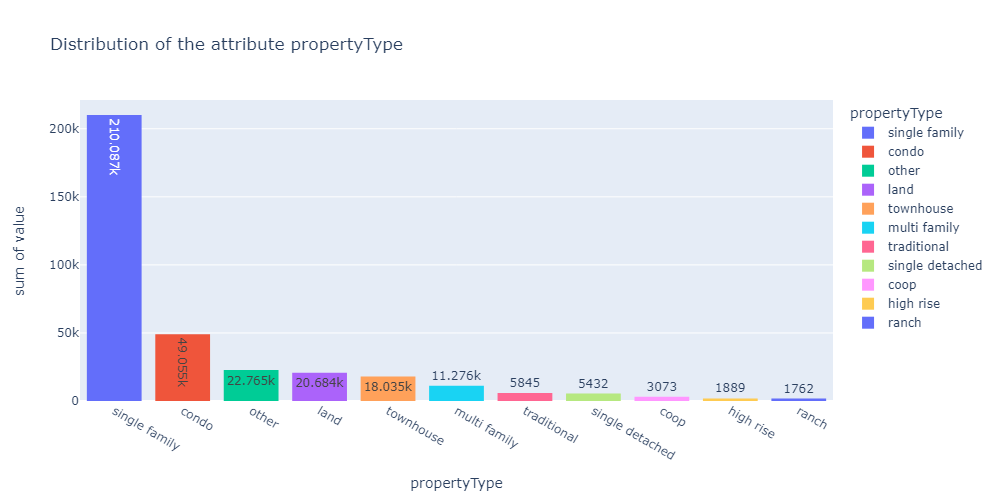

In [103]:
fig = px.histogram(
    data_frame=date_estate.groupby(['propertyType'], as_index=False)['target_clear'].count().sort_values(by=['target_clear'], ascending=False),
    x='propertyType',
    y= ['target_clear'],
    color='propertyType',
    height=500, 
    width=1000, 
    title='Distribution of the attribute propertyType',
    text_auto=True   
)

fig.show()

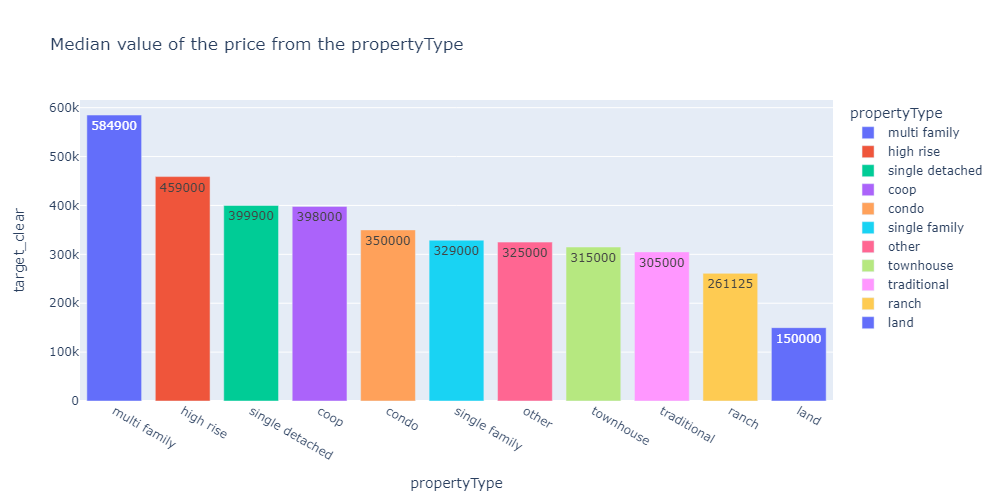

In [104]:
fig = px.bar(
    data_frame= date_estate.groupby(['propertyType'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='propertyType',
    y='target_clear',
    color='propertyType',
    text='target_clear', 
    orientation='v',
    title='Median value of the price from the propertyType',
    height=500, 
    width=1000   
)

fig.show()

Более 2/3 объявлений о продаже недвижимости приходится на категорию **single family**(на одну семью), также видим, что данный признак существенно влияет на цену недвижимости, так для земельных участков(**land**) она наименьшая - $150000.

### **state - target_clear**

Рассмотрим на распределение объявлений в штатах и зависимость целевой переменной от данного признака.

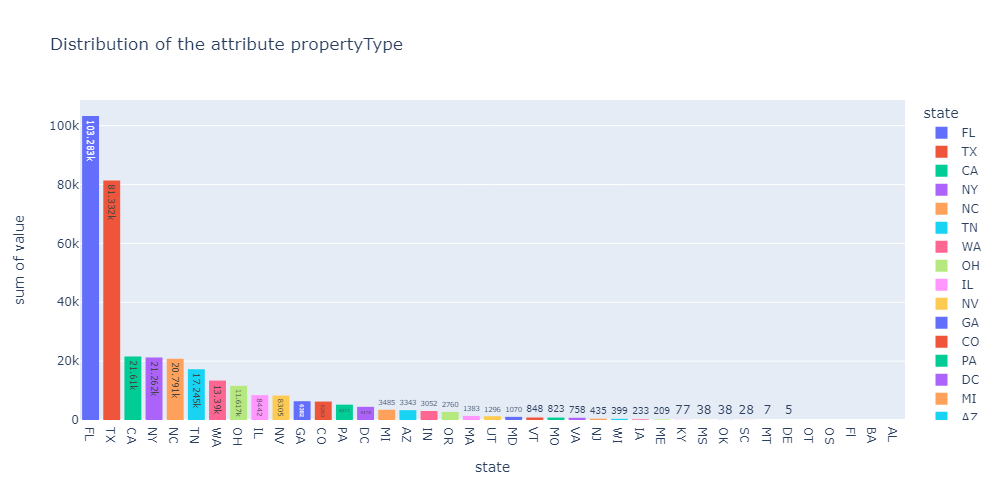

In [105]:
fig = px.histogram(
    data_frame=date_estate.groupby(['state'], as_index=False)['target_clear'].count().sort_values(by=['target_clear'], ascending=False),
    x='state',
    y= ['target_clear'],
    color='state',
    height=500, 
    width=1000, 
    title='Distribution of the attribute propertyType',
    text_auto=True   
)

fig.show()

Отобразим объекты на географической карте:

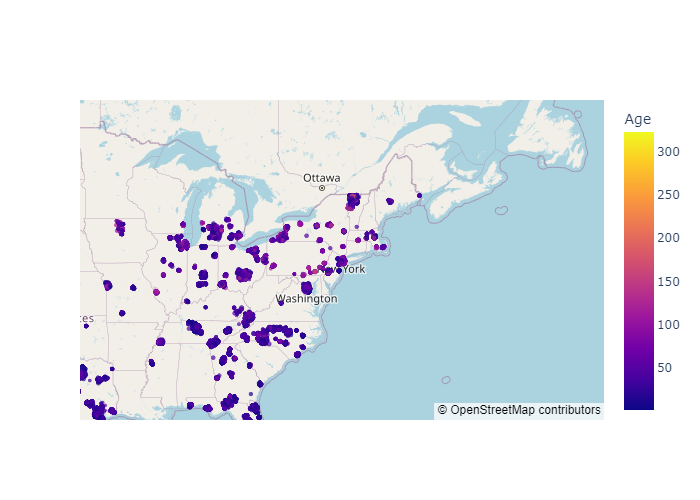

In [106]:
def to_int_size(value):
    try:
        return np.log10(int(value))
    except:
        return np.log10(int(value.split('[')[0]))

fig = go.Figure(go.Scattermapbox(lat=date_estate['latitude'], lon=date_estate['longitude'], text=date_estate[['city', 'age']], name='Estate on a geographical map', 
                                 marker=dict(size=date_estate['target_clear'].map(to_int_size), colorbar=dict(title="Age"), color=date_estate['age'])))
# центрирование карты на Нью-Йорк
capital = date_estate[date_estate['city']=='New York']
map_center = go.layout.mapbox.Center(lat=capital['latitude'].values[0], lon=capital['longitude'].values[0])
# Аналог с помощью словаря
#map_center =                   dict(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])

fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=3))
fig.show()

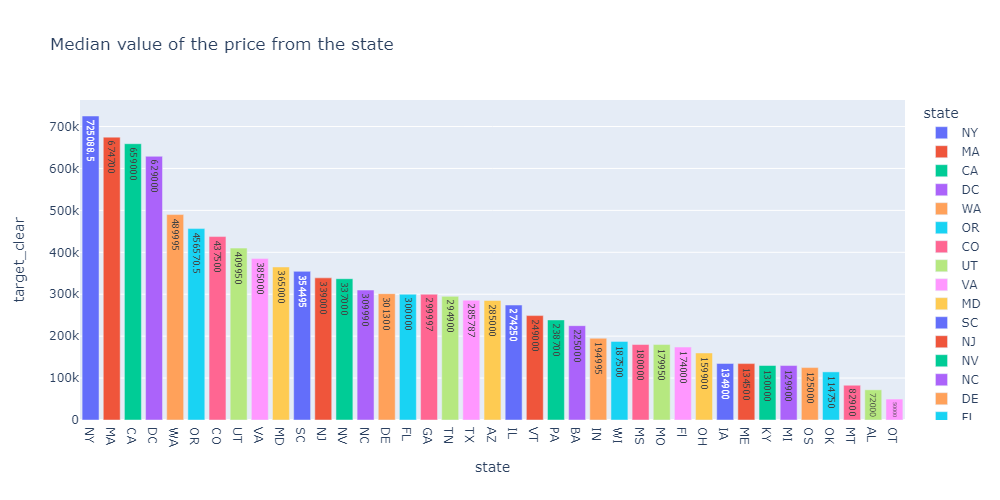

In [107]:
fig = px.bar(
    data_frame= date_estate.groupby(['state'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='state',
    y='target_clear',
    color='state',
    text='target_clear', 
    orientation='v',
    title='Median value of the price from the state',
    height=500, 
    width=1000   
)

fig.show()

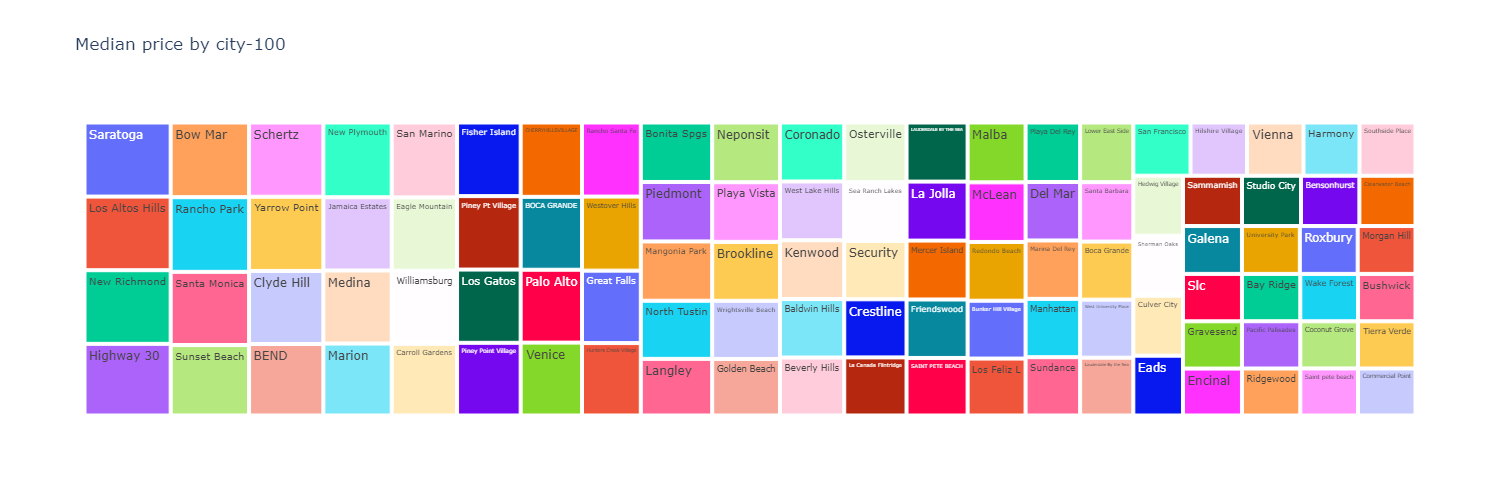

In [108]:
treemap_data = date_estate.groupby(
    by='city',
    as_index=False
)[['target_clear']].median().sort_values(by=['target_clear'], ascending=False)[:101]

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['city'], #категориальный признак, для которого строится график
    values='target_clear', #параметр, который сравнивается
    height=500, #высота
    width=1500, #ширина
    title='Median price by city-100' #заголовок    
)

#отображаем график
fig.show()

Объявления представлены из 39 разных штатов(из 50), болше всего предложиний из штата Флорида(FL) - более 103 тыс. и штата Техас(TX) - более 81 тыс.

Что касаемое медианной цены недвижимости, то в топ-лидерах штаты:

- Нью-Йорк(NY) - $726850
- Массачусетс(MA) - $674700
- Калифорния(CA) - $659000
- Округ Колумбия(DC) - $629000

Наименьшая стоимость:

- OT - $50000
- Алабама(AL) - $72000
- Монтана(MT) - $82900
- Оклахома(OK) - $114750

Предполагаем о влиянии данного признака на цену недвижимости. 

Также стоит отметить топ-город по цене недвижимости:

- Saratoga(штат Калифорния) - $2998000
- Los Altos Hills(штат Калифорния) - $2980000
- New Richmond(штат Огайо) - $2980000
- Highway 30(штат Оклахома) - $2900000
- Bow Mar(штат Колорадо) - $2750000
- Rancho Park(штат Калифорния) - $2750000
- Santa Monica(штат Калифорния) - $2695000
- Sunset Beach(штат Серерная Каролина) - $2595000

Наименьшая стоимость:

- Ford Hancock(штат Техас) - $35000
- Wayland(штат Миссури) - $35200
- Mem () - $35900
- Minnie(штат Флорида) - $37000
- Shillington(штат Пенсильвания) - $38566

### **beds - target_clear**

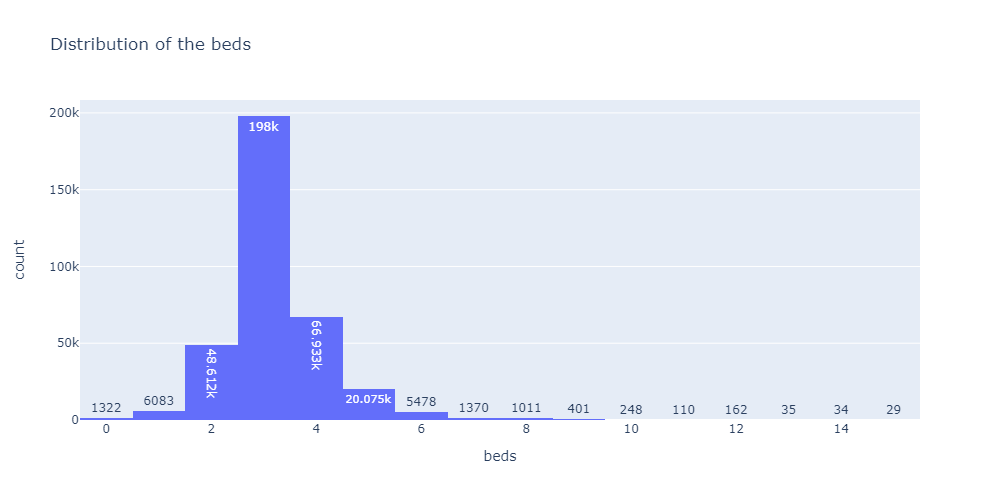

In [109]:
fig = px.histogram(
    data_frame=date_estate,
    x='beds',    
    title='Distribution of the beds',
    text_auto=True,    
    height=500,    
    width=1000      
)
fig.show()

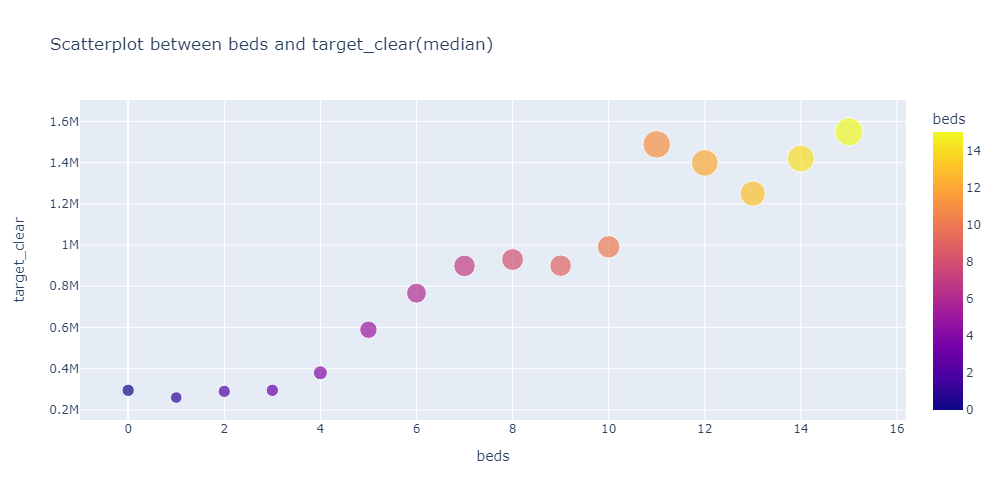

In [110]:
fig = px.scatter(
    data_frame=date_estate.groupby(['beds'], as_index=False)['target_clear'].median(),
    x='beds',   
    y='target_clear',
    color='beds',
    title='Scatterplot between beds and target_clear(median)',       
    height=500,    
    width=1000,
    size='target_clear'       
)
fig.show()

Видим зависимость цены недвижимости от числа комнат - при чём до трёх включительно разница небольшая, после трёх видно ускорение в увеличении стоимости: особенно скачок после 4 комант, после 10 комнат. Опять же с 7 до 10 комнат разница несущественна - возможна связано, с небольшой разницей в общей площади дома и более меньшими площадями самих комнат. Топовое количество комнат - 3(более 198 тыс. объектов). Интересны объекты с 1/9/13 комнатами, где стоимость ниже аналогичных объектов с меньшим количеством комнат.

### **baths - target_clear**

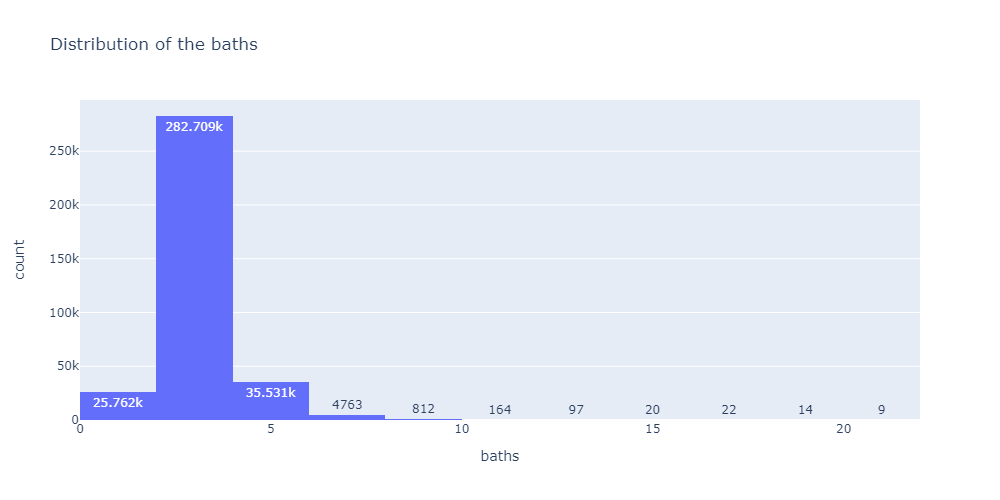

In [111]:
fig = px.histogram(
    data_frame=date_estate,
    x='baths',    
    title='Distribution of the baths',
    text_auto=True,    
    height=500,    
    width=1000,
    nbins=20     
)
fig.show()

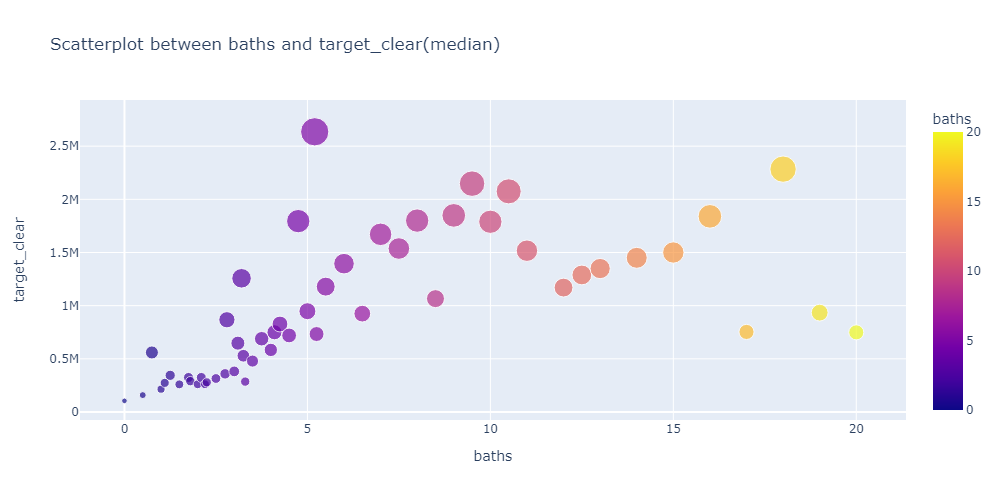

In [112]:
fig = px.scatter(
    data_frame=date_estate.groupby(['baths'], as_index=False)['target_clear'].median(),
    x='baths',   
    y='target_clear',
    color='baths',
    title='Scatterplot between baths and target_clear(median)',       
    height=500,    
    width=1000,
    size='target_clear'       
)
fig.show()

Картинка неоднозначная - да, видим, что при увеличении количества ванных комнат растёт и медианная стоимость недвижимости, но интересны некоторые значения, которые выпадают из общего тренда:

- участок с 10 по 12 включительно цена наоборот снижается - в том числе за счёт того, что снижается средняя площадь недвижимости как увидим позже
- значения baths с 17/19/20 - через чур низкие - объясняется тем, что данные объекты расположены в штатах с более низкой медианной стоимостью недвижимости(Техас(TX), Флорида(FL)). Представлено немного объектов
- значения 5.2, 4.75, 3.2 - через чур высокие - недвижимость из априори дорогих штатов. Представлено немного объектов
- значения 6.5/8.5 - ниже - из-за того, что основная масса предложений в данной категории из штата Флорида(FL), а это недвижимости типа single family. Если посмотреть на медианную площадь данной недвижимости в штате Флорида и в других штатах, то мы увидим, что во Флориде она существенно меньше(3544 против 6590 sqft). Представлено немного объектов

Основная доля объектов приходится с количеством ванных комнат от 2 до 4(медианное значение 2.25). Зависимость прослеживается.

In [113]:
print(f'Медианная площадь дома 6.5/8.5 в других штатах - {date_estate[(date_estate["state"]!="FL") & ((date_estate["propertyType"]=="single family")) & ((date_estate["baths"]==8.50) | (date_estate["baths"]==6.50))]["sqft"].median()}')

print(f'Медианная площадь дома 6.5/8.5 в штатае FL - {date_estate[(date_estate["state"] == "FL") & ((date_estate["propertyType"]=="single family")) & ((date_estate["baths"]==8.50)|(date_estate["baths"]==6.50))]["sqft"].median()}')

Медианная площадь дома 6.5/8.5 в других штатах - 6590.0
Медианная площадь дома 6.5/8.5 в штатае FL - 3544.0


### **sqft - target_clear**

Признак sqft имеет большой разброс(квадратичное отклонение 772338) - от 0 до 456602500 квадратных фунтов, при этом медианное значение равняется 1800. Пока никаких манипуляций с ним производить не будем, но учтём этот момент на будущее.

In [114]:
date_estate['sqft'].describe()

count    3.499030e+05
mean     4.041659e+03
std      7.723384e+05
min      0.000000e+00
25%      1.312000e+03
50%      1.800000e+03
75%      2.450000e+03
max      4.566025e+08
Name: sqft, dtype: float64

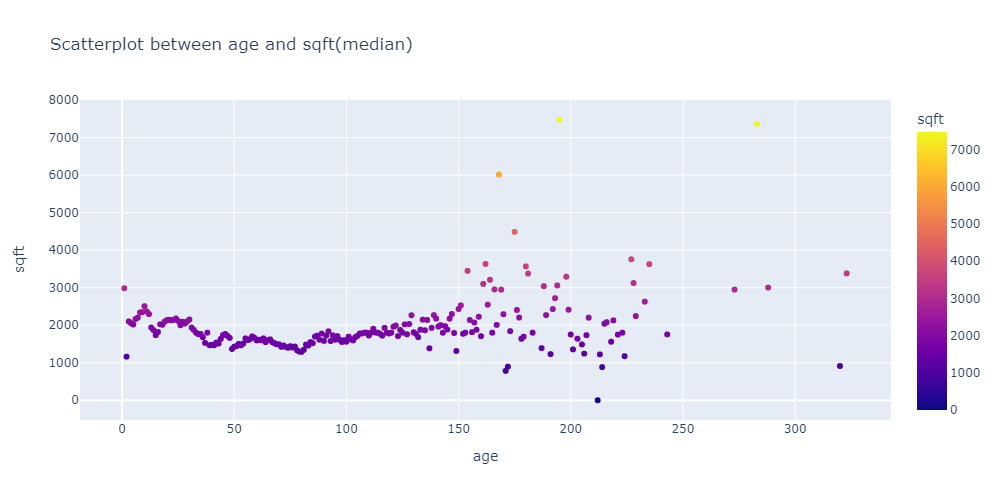

In [115]:
fig = px.scatter(
    data_frame=date_estate.groupby(['age'], as_index=False)['sqft'].median(),
    y='sqft',   
    x='age',
    color='sqft',
    title='Scatterplot between age and sqft(median)',       
    height=500,    
    width=1000,
    #size='sqft'       
)
fig.show()

Интересную информацию даёт график зависимости медианной площади недвижимости в зависимости от возраста:

- старые дома(более 100-120 лет - старше 1900 г) имеют более большой диапазон в площадях домов, они разнятся от года к году, много домов большой площади, далее они приходят к более единой медианной площади разнявшихся несильно. Отметим, что если необходим дом с большой площадью, то стоит его подыскивать именно в этой категории.
- период 90-100 лет(1922-1932 гг) - замечено увеличение площадей дома(в среднем с 1560 до 1800) - как раз в Америке совпал данный период с бурным экономическим ростом, закончившись великой депрессией 1929г.
- период 80-90 лет(1932-1942 гг) - снижение медианных площадей(до 1344) опять же вызванных экономическим кризисом
- период 58-80 (1942-1964 гг) - бурный рост площадей до 1700 совпавшим с экономическим ростом
- периоды 49-58(1964-1980 гг) - снижение до 1426(1973 г. - нефтяной кризис), 1975-1981(снижение до 1477 с ростом в 1976)
- период 20-49(1981-2000гг) - бурный рост до 2130
- период 0-20 (2000-2022гг) - наблюдалось снижение(до 1700) на фоне кризиса в Америке в нулевых, далее взлёт до 2506 и коррекция к 2018 с тенденцией на уменьшение площади


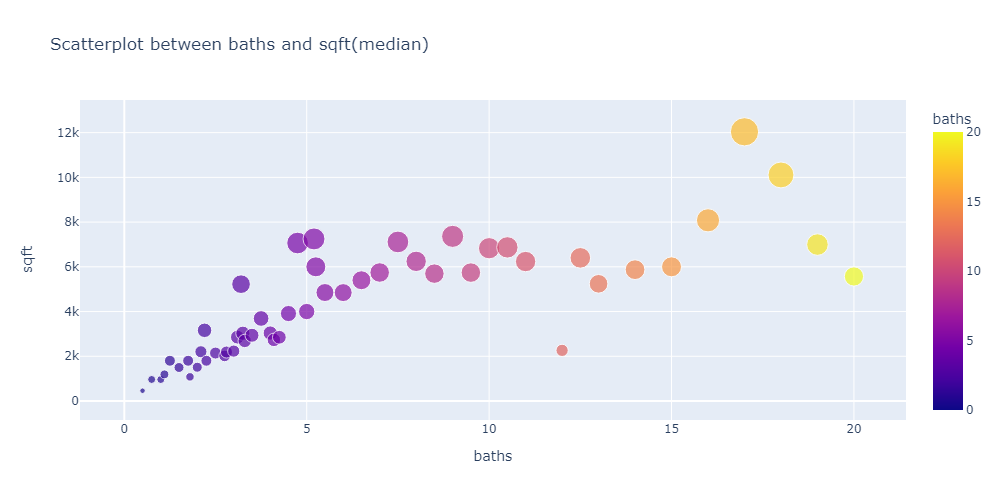

In [116]:
fig = px.scatter(
    data_frame=date_estate.groupby(['baths'], as_index=False)['sqft'].median(),
    y='sqft',   
    x='baths',
    color='baths',
    title='Scatterplot between baths and sqft(median)',       
    height=500,    
    width=1000,
    size='sqft'       
)
fig.show()

Ранее мы рассматривали зависимость целевой переменной от количества ванных комнат и выявили объекты, у которых стоимость недвижимости снижалось после достижения ванных комнат 9 и  до 15, и мы выдвигали гипотезу, что с ростом ванных комнат растёт и цена недвижимости, но при достижении числа 9(и вплоть до 15)начинается снижение медианной площади недвижимости - график подтвердил наши догадки.


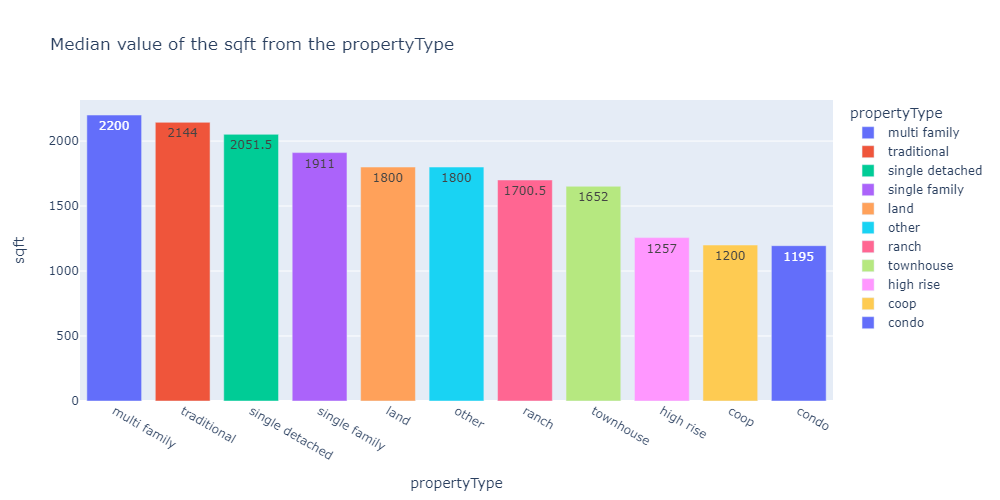

In [117]:
fig = px.bar(
    data_frame= date_estate.groupby(['propertyType'], as_index=False)['sqft'].median().sort_values(by=['sqft'], ascending=False),
    x='propertyType',
    y='sqft',
    color='propertyType',
    text='sqft', 
    orientation='v',
    title='Median value of the sqft from the propertyType',
    height=500, 
    width=1000   
)

fig.show()

Ожидаемые ТОП типов недвижимости по площадям:

- multi family - 2200
- traditional - 2144
- single detached - 2051.5
- single family - 1911

Наимение это condo(1195), coop(1200), high rise(1257)

### **stories -target_clear**

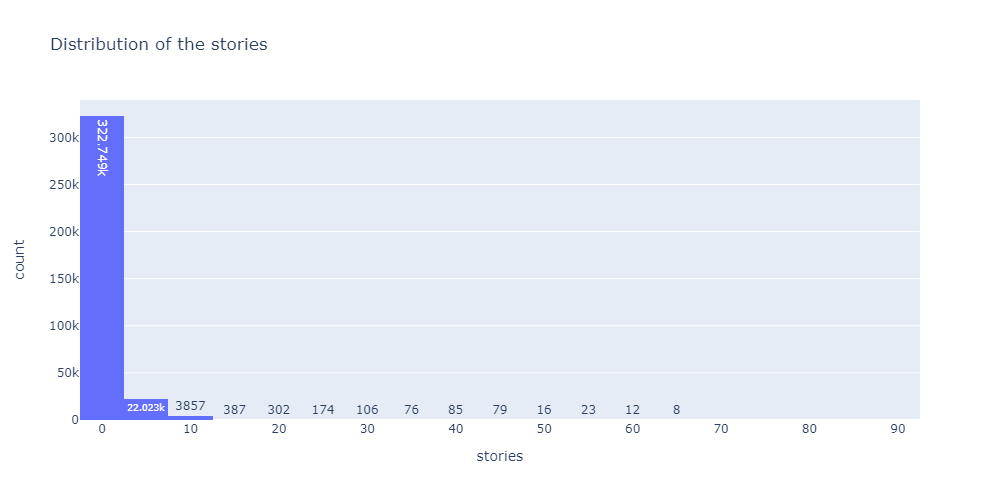

In [118]:
fig = px.histogram(
    data_frame=date_estate,
    x='stories',    
    title='Distribution of the stories',
    text_auto=True,    
    height=500,    
    width=1000,
    nbins=40     
)
fig.show()

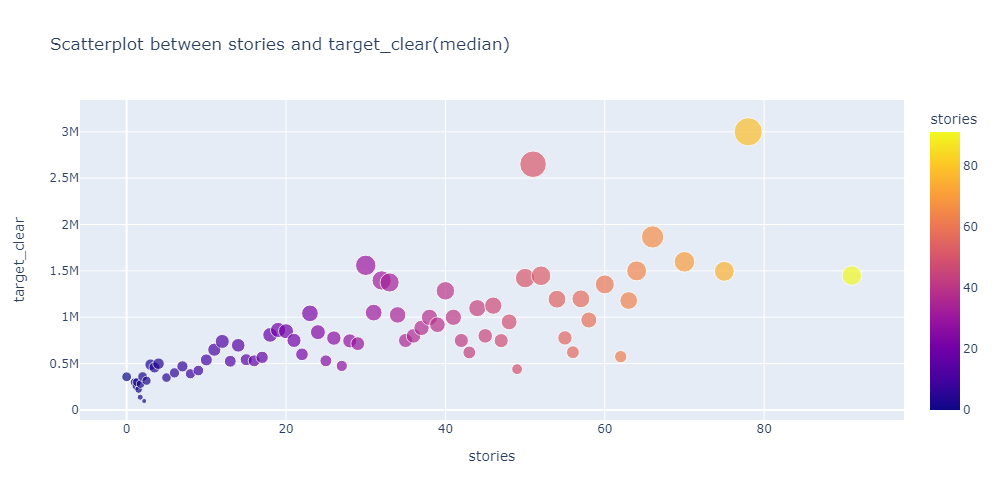

In [119]:
fig = px.scatter(
    data_frame=date_estate.groupby(['stories'], as_index=False)['target_clear'].median(),
    x='stories',   
    y='target_clear',
    color='stories',
    title='Scatterplot between stories and target_clear(median)',       
    height=500,    
    width=1000,
    size='target_clear'       
)
fig.show()

Основная часть недвижимости расположена на 2-3 этажах, медианное значение - 1 этаж, что вполне объяснимо так как это частные дома. Имеется плавная прямая зависимость стоимости от этажности строения.

### **heating-target_clear**

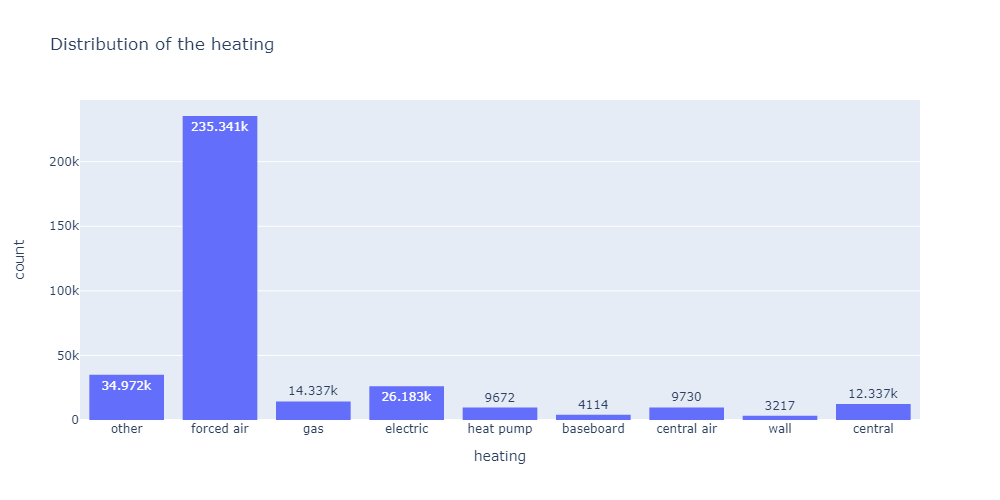

In [120]:
fig = px.histogram(
    data_frame=date_estate,
    x='heating',    
    title='Distribution of the heating',
    text_auto=True,    
    height=500,    
    width=1000        
)
fig.show()

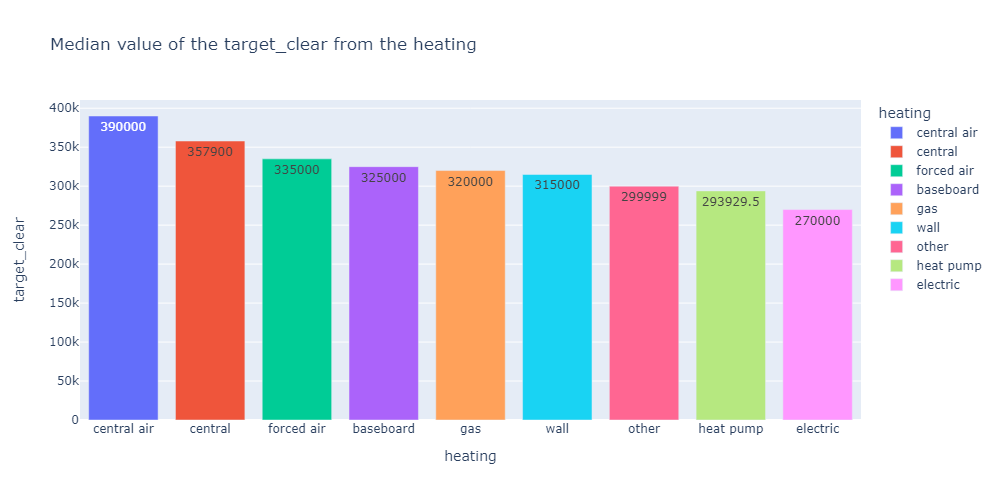

In [121]:
fig = px.bar(
    data_frame= date_estate.groupby(['heating'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='heating',
    y='target_clear',
    color='heating',
    text='target_clear', 
    orientation='v',
    title='Median value of the target_clear from the heating',
    height=500, 
    width=1000   
)

fig.show()

Преобладающая часть недвижимость с отоплением типа forced air - медианная стоимость такой недвижимости - $335000, самая дорогая недвижимость с central air/central - $390000/$357900, а с электрическим отоплением(electric) наименьшая - $270000.

### **cooling - target_clear**

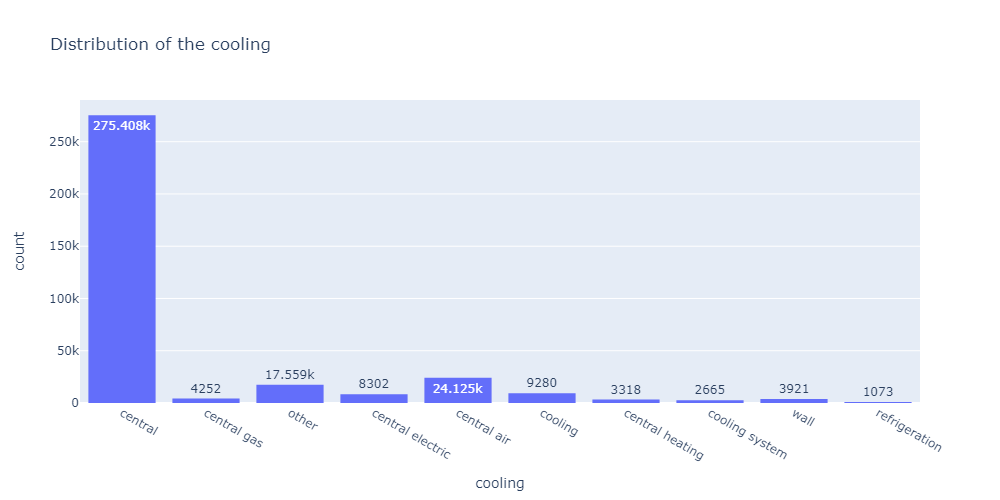

In [122]:
fig = px.histogram(
    data_frame=date_estate,
    x='cooling',    
    title='Distribution of the cooling',
    text_auto=True,    
    height=500,    
    width=1000        
)
fig.show()

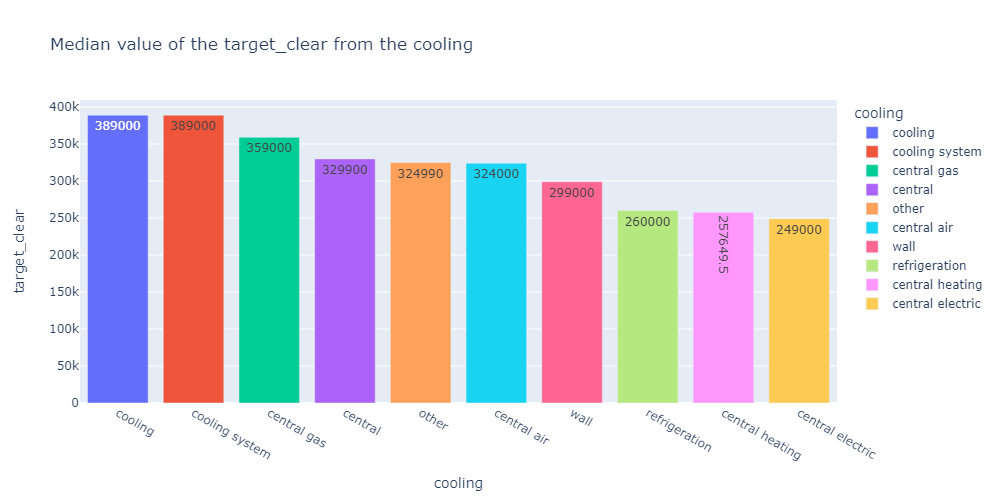

In [123]:
fig = px.bar(
    data_frame= date_estate.groupby(['cooling'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='cooling',
    y='target_clear',
    color='cooling',
    text='target_clear', 
    orientation='v',
    title='Median value of the target_clear from the cooling',
    height=500, 
    width=1000   
)

fig.show()

### **parking - target_clear**

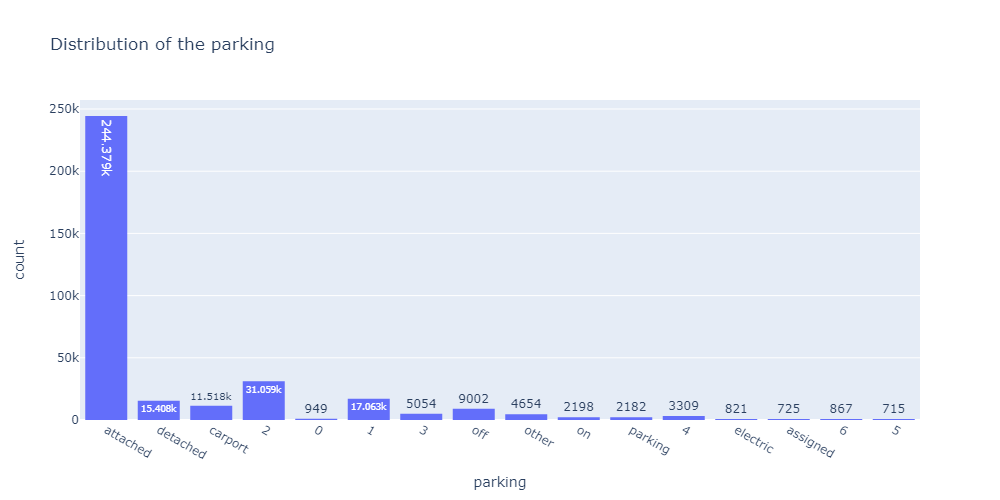

In [124]:
fig = px.histogram(
    data_frame=date_estate,
    x='parking',    
    title='Distribution of the parking',
    text_auto=True,    
    height=500,    
    width=1000        
)
fig.show()

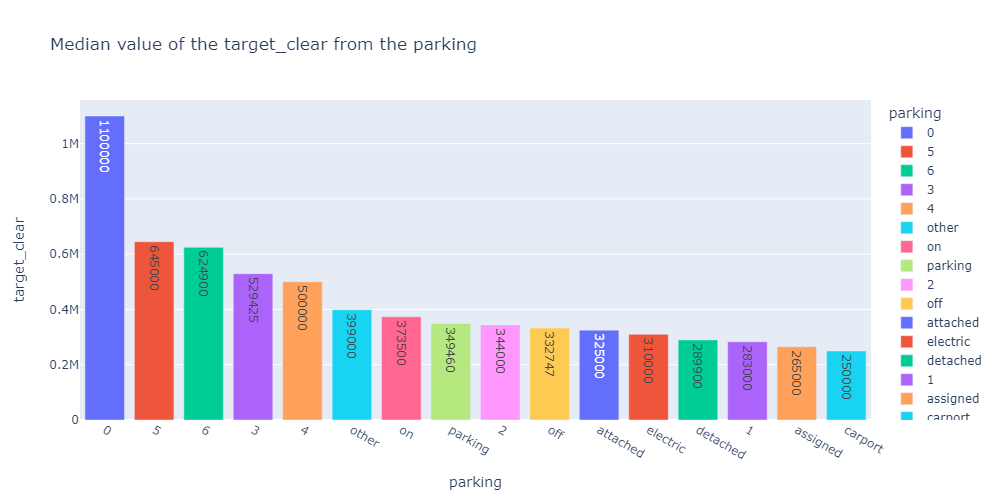

In [125]:
fig = px.bar(
    data_frame= date_estate.groupby(['parking'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='parking',
    y='target_clear',
    color='parking',
    text='target_clear', 
    orientation='v',
    title='Median value of the target_clear from the parking',
    height=500, 
    width=1000   
)

fig.show()

Более 2/3 недвижимости в признаке parking представлены attached(пристроенный гараж) с медианной стоимостью $32500. Интересно, что имеется недвижимость без парковочного места(0) и её стоимость $1100000, что странно, но это объясняется тем, что данная недвижимость представлена из престижного штата Калифорния(CA). 

In [126]:
date_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349903 entries, 0 to 349902
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   status         349903 non-null  object 
 1   propertyType   349903 non-null  object 
 2   baths          349903 non-null  float64
 3   city           349903 non-null  object 
 4   zipcode        349903 non-null  int64  
 5   state          349903 non-null  object 
 6   target_clear   349903 non-null  float64
 7   street         349903 non-null  object 
 8   county         349903 non-null  object 
 9   latitude       349903 non-null  float64
 10  longitude      349903 non-null  float64
 11  sqft           349903 non-null  float64
 12  stories        349903 non-null  float64
 13  beds           349903 non-null  float64
 14  heating        349903 non-null  object 
 15  cooling        349903 non-null  object 
 16  parking        349903 non-null  object 
 17  lotsize        349903 non-nul

### **rating_mean/schools_count - target_clear** 

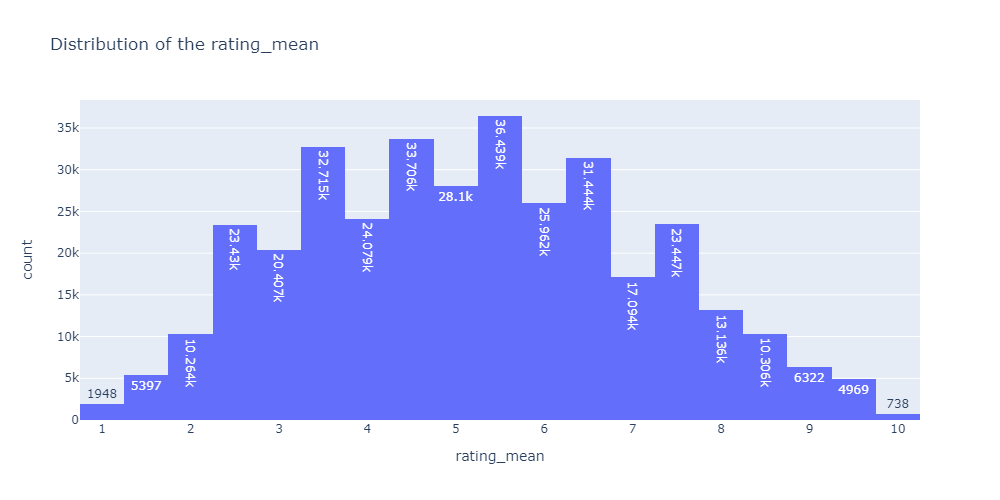

In [127]:
fig = px.histogram(
    data_frame=date_estate,
    x='rating_mean',    
    title='Distribution of the rating_mean',
    text_auto=True,    
    height=500,    
    width=1000,
    nbins=40      
)
fig.show()

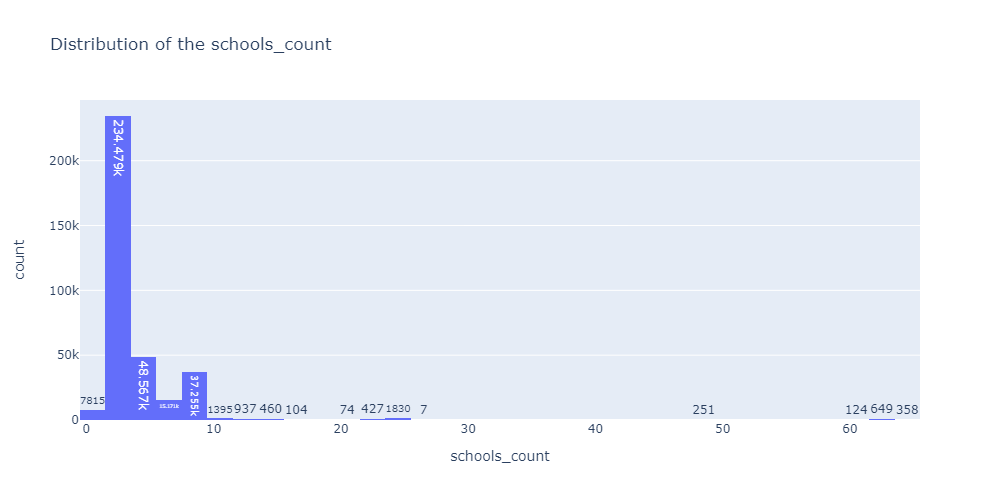

In [128]:
fig = px.histogram(
    data_frame=date_estate,
    x='schools_count',    
    title='Distribution of the schools_count',
    text_auto=True,    
    height=500,    
    width=1000,
    nbins=40        
)
fig.show()

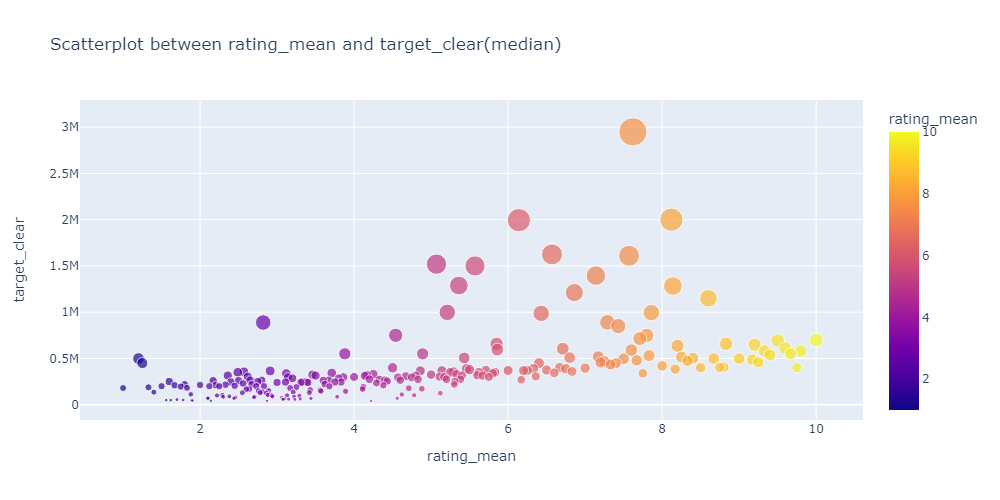

In [129]:
fig = px.scatter(
    data_frame=date_estate.groupby(['rating_mean'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='rating_mean',   
    y='target_clear',
    color='rating_mean',
    title='Scatterplot between rating_mean and target_clear(median)',       
    height=500,    
    width=1000,
    size='target_clear'       
)
fig.show()

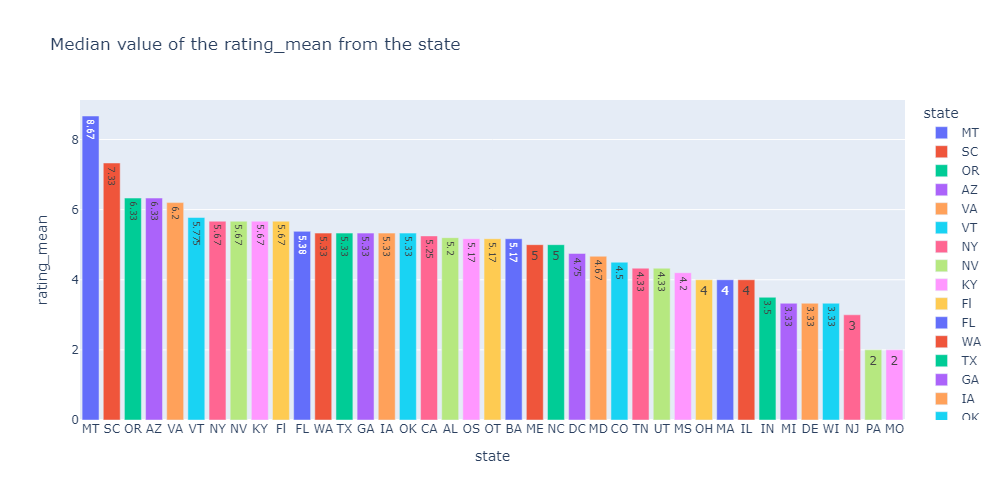

In [137]:
fig = px.bar(
    data_frame= date_estate.groupby(['state'], as_index=False)['rating_mean'].median().sort_values(by=['rating_mean'], ascending=False),
    x='state',
    y='rating_mean',
    color='state',
    text='rating_mean', 
    orientation='v',
    title='Median value of the rating_mean from the state',
    height=500, 
    width=1000   
)

fig.show()

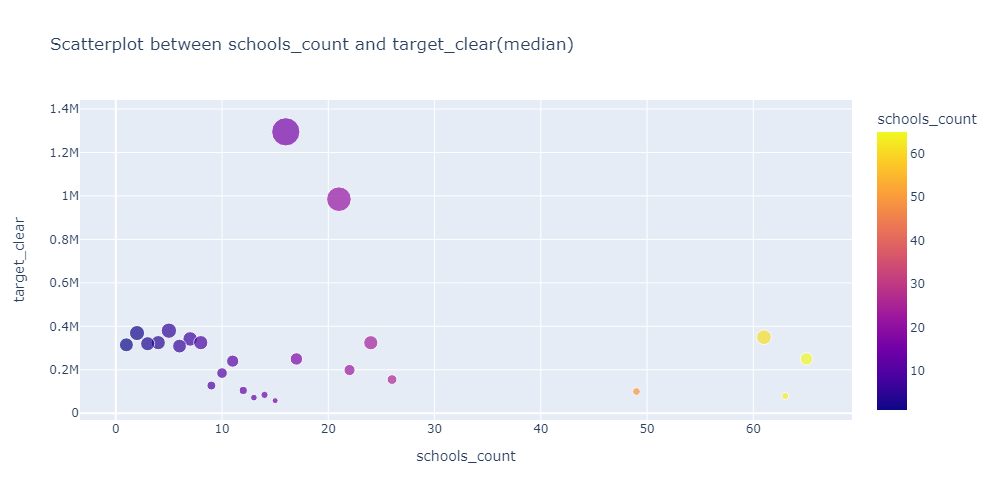

In [131]:
fig = px.scatter(
    data_frame=date_estate.groupby(['schools_count'], as_index=False)['target_clear'].median().sort_values(by=['target_clear'], ascending=False),
    x='schools_count',   
    y='target_clear',
    color='schools_count',
    title='Scatterplot between schools_count and target_clear(median)',       
    height=500,    
    width=1000,
    size='target_clear'       
)
fig.show()

In [132]:
date_estate['rating_mean'].describe()

count    349903.000000
mean          5.169793
std           1.917962
min           1.000000
25%           3.670000
50%           5.170000
75%           6.500000
max          10.000000
Name: rating_mean, dtype: float64

In [133]:
date_estate['distance_mean'].describe()

count    349903.000000
mean          2.787933
std           5.951895
min           0.020000
25%           1.040000
50%           1.750000
75%           3.110000
max        1590.830000
Name: distance_mean, dtype: float64

Средний рейтинг школ - 5.17, медианное количество школ около объекта недвижимости - 3, расстояние до которых 1.75 мили. От рейтинга школы зависимость целевой переменной прослеживается, но слабая, а вот количество школ в общем не влияет на цену недвижимости, но имеются отдельные выбросы не входящий в общий тренд.

### **age - target_clear**

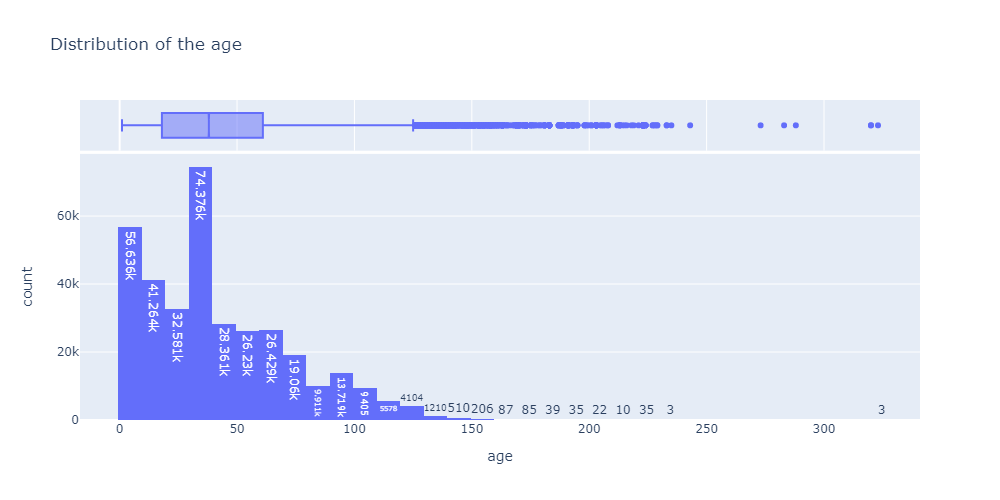

In [134]:
fig = px.histogram(
    data_frame=date_estate,
    x='age',    
    title='Distribution of the age',
    text_auto=True,    
    height=500,    
    width=1000,
    nbins=50,
    marginal='box'     
)
fig.show()

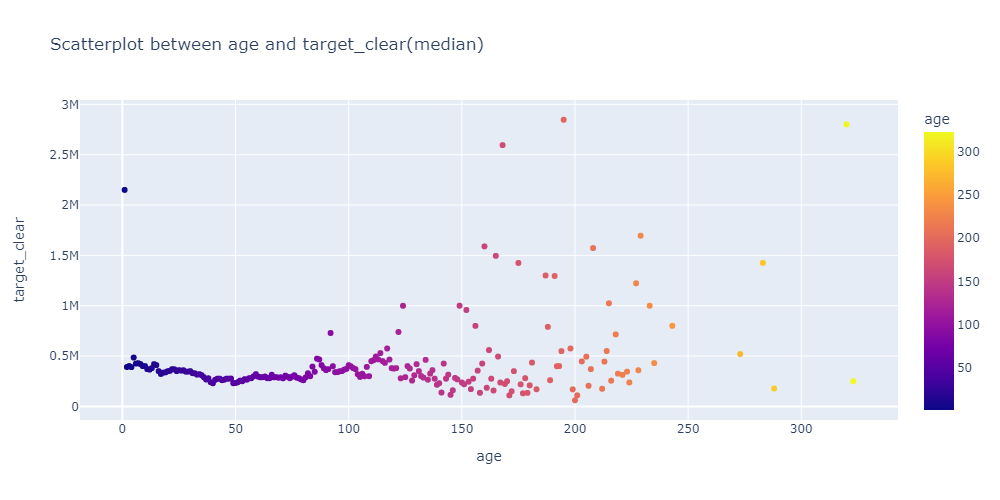

In [136]:
fig = px.scatter(
    data_frame=date_estate.groupby(['age'], as_index=False)['target_clear'].median(),
    x='age',   
    y='target_clear',
    color='age',
    title='Scatterplot between age and target_clear(median)',       
    height=500,    
    width=1000,
    #size='target_clear'       
)
fig.show()

По возрасту недвижимости преобладают объекты 30-39 лет(медианный возраст - 38 лет). В среднем с увеличением возраста недвижимости прослеживается тенденция к уменьшению её стоимости, но довоенная недвижимость(80-87 лет) также держится в цене. Вообщем, что касаемо объектов старше 100 лет, то их можно разделить на два класса - те которые имеют цену ниже рыночной - возможно это объекты требующие вложений/реставрации/расположенных в непристижных районах и второй класс - те, которые стоят существенно дороже - какие-то экслюзивные варианты, также имеющие большую площадь/либо большой земельный участок/лучшую локацию.

Опишем типичный объект из нашего датасета: этот объект является одноэтажным(stories) домом для одной семьи(single family) площадью 1800 квадратных фунтов(sqft) и площадью участка(lotsize) 10890 квадратных фунтов, имеется пристроенный гараж(attached), принудительное воздушное отопление(forced air), 3 комнаты(beds) и 2.5 ванны комнаты(baths), возраст дома 38 лет, рядом(около 1.75 миль) находятся 3 школы(schools_count) со средним рейтингом (rating_mean) равным 5.17. Объект в статусе для продажи(for sale) и оценивается около $327018.

### **Отбор признаков**

В нашем датасете сформировано 24 признака, 9 из которых имеют тип object, закодируем их, далее полученные признаки будем приводить к одному виду - нормировать/стандартизировать т.к. числовые величины, которыми описываются признаки имеют разный порядок и более большие по модулю сбивают модель в свою сторону. Для начала построим матрицу корреляции для обнаружения линейной связи между целевым признаком и предикторами, а также признаки, которые сильно закоррелированные между собой:

<AxesSubplot:>

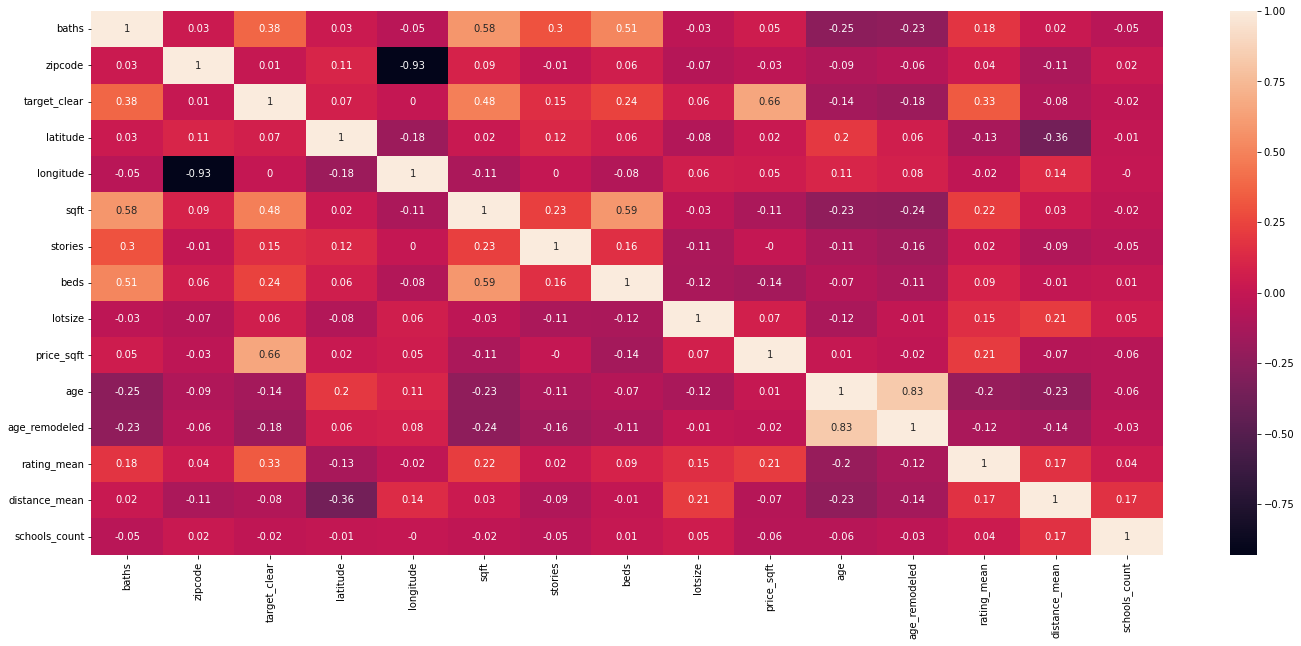

In [141]:
# строим матрицу корреляции
fig, axes = plt.subplots(figsize=(24, 10))
sns.heatmap(round(date_estate.corr(method='spearman'), 2), annot=True)

Видим корреляцию целевого признака с:
- price_sqft - 0.66
- sqft - 0.48
- baths - 0.38
- rating_mean - 0.33
- beds - 0.24

заметны сильноскореллированные признаки, такие как, age/age_remodeled(0.83), zip_code/longitude(-0.93) - часть из них придётся убрать. Остаётся вопрос о спорном признаке price_sqft - через который как бы происходит утечка информации о целевом признаке, удалим его. 

В наших данных имеются несколько признаков ниже, которые сообщают нам одну и ту же информацию, а именно о локации объекта недвижимости - данный фактор существенен для определения стоимости недвижимости:

- city
- state
- zipcode
- county
- latitude
- longitude
- street

Все признаки типа object, кроме zipcode(переведён нами в числовой), latitude, longitude - оставим эти три признака опеределяющих местоположение, остальные удалим. Также стоит заметить, что признак street использовать не получиться из-за большого количества уникальных значений и при кодировании получим очень много признаков.

Подготовим данные: удалим часть предикторов, необходимые закодируем, далее выборку разделим на тренировочну и тестовую в соотношении 70/30, далее нормализуем данные.

In [4]:
X = date_estate.drop(['city', 'street', 'state', 'county', 'age_remodeled', 'price_sqft', 'target_clear'], axis=1)
y = date_estate['target_clear']
object_columns = [s for s in X.columns if X[s].dtypes == 'object']
X = pd.get_dummies(X, columns=object_columns, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42,
    shuffle=True
)

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
X_train_scal = r_scaler.fit_transform(X_train)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
X_train_scal = pd.DataFrame(X_train_scal, columns=X_train.columns)
X_test_scal = pd.DataFrame(r_scaler.transform(X_test), columns=X_test.columns)

In [5]:
X_train_scal.shape

(244932, 59)

## 4. Моделирование

### **Линейная регрессия**

Для начала сформируем базовую модели, которую будем улучшать базовая модель будет строиться на всех признаках(59), далее производим предсказание на тренировочных и тестовых данных и проверяем метрики. Договоримся о метриках - будем использовать три метрики - MAE(используем больше для себя - для понимания в абсолютных величинах на сколько в среднем ошибается модель, данную величину легко сравнить с медианной стоимостью недвижимости), MSE и R2 для сравнения моделей между собой.

In [6]:
def metrics_func(y_train, y_train_pred, y_test, y_test_predict):
    """ Возвращает метрики MAE, MSE, R2 для тренировочной и тестовой выборок

    Args:
        y_train (Series): истинные значения целевой переменной для тренировочной выборки
        y_train_pred (Series): предсказанные значения для тренировочной выборки
        y_test (Series): истинные значения целевой переменной для тестовой выборки
        y_test_predict (Series): предсказанные значения для тестовой выборки
    """
    
    print(f'MAE:')
    print(f'For TRAIN = {round(metrics.mean_absolute_error(y_train, y_train_pred), 2)}')
    print(f'For TEST = {round(metrics.mean_absolute_error(y_test, y_test_predict), 2)}')
    print()
    print(f'MSE:')
    print(f'For TRAIN = {round(metrics.mean_squared_error(y_train, y_train_pred))}')
    print(f'For TEST = {round(metrics.mean_squared_error(y_test, y_test_predict))}')
    print()
    print(f'R2:')
    print(f'For TRAIN = {round(metrics.r2_score(y_train, y_train_pred), 2)}')
    print(f'For TEST = {round(metrics.r2_score(y_test, y_test_predict), 2)}')

In [8]:
model_base = LinearRegression()
model_base.fit(X_train_scal, y_train)
y_train_predict = model_base.predict(X_train_scal)
y_test_predict = model_base.predict(X_test_scal)
metrics_func(y_train, y_train_predict, y_test, y_test_predict)

MAE:
For TRAIN = 257248.3
For TEST = 257112.6

MSE:
For TRAIN = 158219290108
For TEST = 271204864430

R2:
For TRAIN = 0.3
For TEST = -0.19


Базовая модель показала не лучшие метрики - абсолютная ошибка в размере более $256000 величина сильно большая. Коэффицент детерминации сильно различается для тренировочных и тестовых данных, что говорит о том, что модель не уловила зависимости, а возможно звисимость сложнее(нелинейная). Поробуем обучить модель на 25 отобранных лучших признаках - для этого используем SelectKBest:

In [9]:
selector = feature_selection.SelectKBest(feature_selection.f_regression, k=25)
selector.fit(X_train_scal, y_train)
best_features = selector.get_feature_names_out()
best_features

array(['baths', 'latitude', 'longitude', 'stories', 'beds', 'rating_mean',
       'schools_count', 'status_foreclosure', 'status_new construction',
       'status_other', 'status_pending', 'propertyType_land',
       'propertyType_multi family', 'propertyType_townhouse',
       'heating_electric', 'heating_forced air',
       'cooling_central electric', 'cooling_central heating', 'parking_1',
       'parking_3', 'parking_4', 'parking_5', 'parking_6',
       'parking_carport', 'parking_other'], dtype=object)

Интересно отметить, что в список топ-25 не вошли такие признаки, как sqft(площадь дома), который указывает на общий размер недвижимости и zipcode(индекс), который указывает на локацию недвижимости, а она влияет непостедственно на его цену. Без данных признаков модель скорее всего будет несостоятельна. 

Также стоит предположить, что данная проблема возникла из-за того, что в алгоритме **SelectBest** используется корреляция Пирсона, что в данной задаче недопустима из-за того, что целевой признак нераспеределён нормально и необходимо исследовать линейные связи между предикторами и целевой переменной опираясь на корреляцию Спирмена. 

По корреляции Спирмена между sqft и target_clear составляет 0.48(можно увидеть на графике корреляции выше), но как будет продемонстрировано ниже, если использовать корреляцию Пирсона, то значение не будет превышать 0.029, поэтому он не отобран в ТОП-25. Что касаемо признака zipcode, то и корреляция Спирмена невысока - 0.01 - здесь дело в том, что данный предиктор хоть и представлен в числовом виде является категориальной переменной и необходимо её использовать именно в виде списка категорий индексов предварительно произведя их разбивку. Пока будем выполнять построение моеделей согласно отобранным признакам.

In [280]:
# корреляция Пирсона между sqft/target_clear
np.corrcoef(X_train_scal['sqft'], y_train)

array([[1.        , 0.02897089],
       [0.02897089, 1.        ]])

Первой построим линейную регрессию.

In [10]:
model_1 = LinearRegression()
model_1.fit(X_train_scal[best_features], y_train)
y_train_predict = model_1.predict(X_train_scal[best_features])
y_test_predict = model_1.predict(X_test_scal[best_features])
metrics_func(y_train, y_train_predict, y_test, y_test_predict)

MAE:
For TRAIN = 268720.71
For TEST = 267016.75

MSE:
For TRAIN = 171176319404
For TEST = 172129476873

R2:
For TRAIN = 0.24
For TEST = 0.24


Модель, построенная на 25 лучших признаках показала стабильно метрику R2=0.24, но улавливаемая закономерность линейной модели очень низкая. Попробуем отобрать линейную модель с лучшими признаками, используя метод пошаговой регрессии. Понадобится пакет [dmba](https://pypi.org/project/dmba/) с импортированными функциями stepwise_selection и метрикой AIC_score. [AIC(информационный критерий Акаике)](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%90%D0%BA%D0%B0%D0%B8%D0%BA%D0%B5)  - данная метрика штрафует добавление членов в модель. В нашем случае будем производить поиск оптимальной модели ориентируясь на самый низкий AIC, для этого начнём с построенной модели на константе, вычисляем метрику, далее добавляем один признак, снова расчитываем метрику, далее добавляется следующий и т.д. т.е выполняя таким образом пошаговую регрессию.

In [35]:
def train_model(variables):
    """ Функция, которая возращает подогнанную модель для заданного множества переменных

    Args:
        variables (DateFrame):признаки

    Returns:
        model: подогнанная модель
    """
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train_scal[variables], y_train)
    return model

def score_model(model, variables):
    """ Возвращает метрику для данной модели и множества переменных

    Args:
        model : подогнанная модель
        variables : признаки

    Returns:
        float: AIC
    """
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train_scal[variables]), model)

best_model, best_variables = stepwise_selection(X_train_scal.columns, train_model, score_model, verbose=False)

print(f'Пересечение: {best_model.intercept_:.3f}')
print('Коэффициенты:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'{name}:{coef}')

Пересечение: 400904.320
Коэффициенты:
baths:191382.96573905452
rating_mean:143298.46108153716
latitude:19130.23054588408
age:56816.88879651192
propertyType_single family:-115873.54344767805
propertyType_townhouse:-178352.0860651561
propertyType_land:-171549.6915817788
stories:16058.834308359765
status_for sale:-114476.17508622126
status_foreclosure:-221632.79314923566
heating_forced air:84395.4771314933
heating_central:120538.80919214225
longitude:-284903.30540456565
zipcode:-381664.3280939583
status_other:-130867.8049253365
cooling_central gas:167137.8523790548
propertyType_ranch:-246083.5256885169
propertyType_coop:-183419.04858466238
heating_other:77572.59922348481
propertyType_other:-60373.74636460864
propertyType_traditional:-127884.49747884017
schools_count:-2427.792459785356
status_pending:-94463.72121014982
parking_carport:-539663.6284948327
cooling_central air:-86662.59607012442
cooling_refrigeration:-207441.26192445366
parking_4:-390022.8484288245
beds:8569.336529970227
cooli

In [36]:
# строим модель на лучших признаках подогнанных с помощью пошаговой регрессии
model_2 = LinearRegression()
model_2.fit(X_train_scal[best_variables], y_train)
y_train_predict = model_2.predict(X_train_scal[best_variables])
y_test_predict = model_2.predict(X_test_scal[best_variables])
metrics_func(y_train, y_train_predict, y_test, y_test_predict)

MAE:
For TRAIN = 257250.06
For TEST = 257114.31

MSE:
For TRAIN = 158220886283
For TEST = 271184415880

R2:
For TRAIN = 0.3
For TEST = -0.19


Метрики не улутшились, на тестовых данных видим отсутсвие уловимой закономерности - всё таки нет явной линейной связи между предикторами и целевым признаком, попробуем усложнить модель добавив полиноминальные признаки.

### **Полиноминальная регрессия**

In [82]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=True)

poly.fit(X_train_scal[best_features])
X_train_poly = poly.transform(X_train_scal[best_features])
X_test_poly = poly.transform(X_test_scal[best_features])

model_lin_poly = linear_model.LinearRegression()
model_lin_poly.fit(X_train_poly, y_train)
y_train_pred = model_lin_poly.predict(X_train_poly)
y_test_pred = model_lin_poly.predict(X_test_poly)

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 248084.46
For TEST = 247678.27

MSE:
For TRAIN = 149881332123
For TEST = 152423137039

R2:
For TRAIN = 0.34
For TEST = 0.33


При построении модели на полиноминальных признаках второй степени метрики улучшились R2 возросло до 0.34/0.33, но MAE по прежнему высоко - $248000, также на лицо улучшение метрик при уходе от линейной закономерности - связь более сложная.

### DecisionTreeRegressor

Перейдём к модели деревьям решений.

In [90]:
tree_model = tree.DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scal[best_features], y_train)

y_train_pred = tree_model.predict(X_train_scal[best_features])
y_test_pred = tree_model.predict(X_test_scal[best_features])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 60808.66
For TEST = 171667.26

MSE:
For TRAIN = 28904451708
For TEST = 112753565206

R2:
For TRAIN = 0.87
For TEST = 0.5


Данную модель построили на всех признаках, на лицо переобучение модели, поэтому подберём оптимальные параметры глубины дерева.

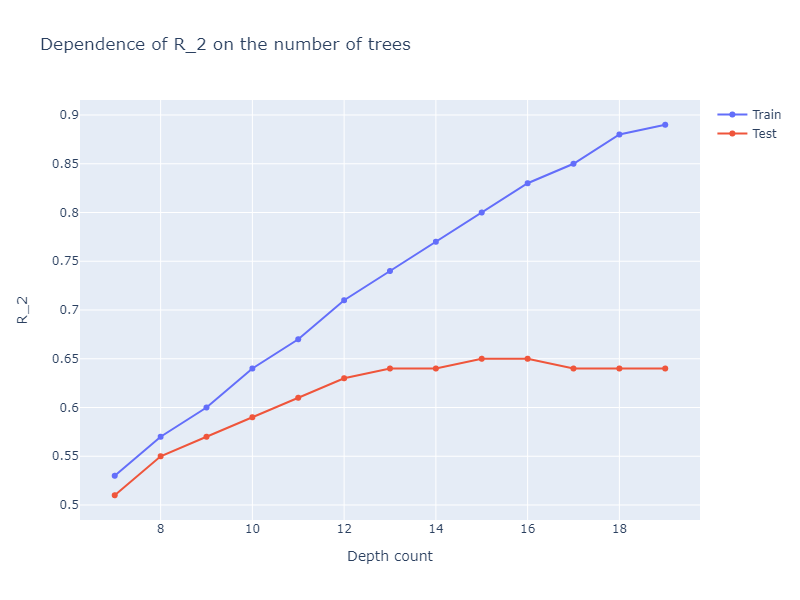

In [145]:
max_depths = range(7, 20)

def tree_depths(X_train, X_test, y_train, y_test):
  R_2_train = []
  R_2_test = []
  for depth in max_depths:
    tree_model = tree.DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train)
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)
    R_2_tr = round(metrics.r2_score(y_train, y_train_pred), 2)
    R_2_tes = round(metrics.r2_score(y_test, y_test_pred), 2)
    R_2_train.append(R_2_tr)
    R_2_test.append(R_2_tes)

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(max_depths), y=R_2_train, name='Train'))
  fig.add_trace(go.Scatter(x=list(max_depths), y=R_2_test, name='Test'))
  fig.update_xaxes(title='Depth count')
  fig.update_yaxes(title='R_2')
  fig.update_layout(title='Dependence of R_2 on the number of trees', height=600, width=800)
  return fig.show()

tree_depths(X_train_scal, X_test_scal, y_train, y_test)

Выберем за оптимальную шлубину - 13 деревьев и построим модель:

In [141]:
tree_model = tree.DecisionTreeRegressor(random_state=42, max_depth=13)
tree_model.fit(X_train_scal[best_features], y_train)

y_train_pred = tree_model.predict(X_train_scal[best_features])
y_test_pred = tree_model.predict(X_test_scal[best_features])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 174877.31
For TEST = 189479.12

MSE:
For TRAIN = 87256673728
For TEST = 105750631695

R2:
For TRAIN = 0.61
For TEST = 0.53


Метрики вновь улучшились, R2 - 0.61/0.53, но обратим внимание, что метрика на тринировочных данных лучше более, чем на 13%, что может говорить о переобучении модели и возможно необходимо снизить глубину.

### Ансамблевые методы

Первой ансамблевой моделью будет бэггинг и его разновидность - модель случайного леса.

In [154]:
# бэггинг случайный лес
random_forest = ensemble.RandomForestRegressor(n_estimators=200,
                                               max_depth=16,                                               
                                               criterion='squared_error',
                                               random_state=42)

random_forest.fit(X_train_scal[best_features], y_train)

y_train_pred = random_forest.predict(X_train_scal[best_features])
y_test_pred = random_forest.predict(X_test_scal[best_features])
metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 144683.3
For TEST = 166601.43

MSE:
For TRAIN = 62151689742
For TEST = 85820337092

R2:
For TRAIN = 0.73
For TEST = 0.62


Второй моделью будет бустинг - AdaBoost.

In [156]:
# бустинг
dt = tree.DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=50, #количество моделей в ансамбле
    learning_rate=0.01
)
# Обучаем модель
ada.fit(X_train_scal[best_features], y_train)

# Формируем предсказание для тестовой выборки
y_train_pred  = ada.predict(X_train_scal[best_features])
y_test_pred = ada.predict(X_test_scal[best_features])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 261662.24
For TEST = 260951.54

MSE:
For TRAIN = 160345221907
For TEST = 160894717786

R2:
For TRAIN = 0.29
For TEST = 0.29


Следующая модель градиентного бустинга:

In [163]:
# градиентный бустинг

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=13, #максимальная глубина дерева
    n_estimators=500, #количество деревьев в ансамбле
    random_state=42, #датчик генератора случайных чисел
    learning_rate=0.01
)

# Обучаем модель
gb.fit(X_train_scal[best_features], y_train)

# Формируем предсказание для тестовой выборки

y_train_pred  = gb.predict(X_train_scal[best_features])
y_test_pred = gb.predict(X_test_scal[best_features])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 132966.41
For TEST = 160251.37

MSE:
For TRAIN = 55492763599
For TEST = 82443637264

R2:
For TRAIN = 0.75
For TEST = 0.64


Ещё одна модель бустинга CatBoost:

In [224]:
catmodel = CatBoostRegressor(random_state=42, verbose=False)
catmodel.fit(X_train_scal[best_features], y_train)

y_train_pred  = catmodel.predict(X_train_scal[best_features])
y_test_pred = catmodel.predict(X_test_scal[best_features])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)


MAE:
For TRAIN = 170727.57
For TEST = 174311.1

MSE:
For TRAIN = 85736294400
For TEST = 91052207220

R2:
For TRAIN = 0.62
For TEST = 0.6


Итого в фаворитах оказываются модели - случайный лес(R2=0.73/0.62), градиентный бустинг(R2=0.75/0.64) и CatBoost(R2=0.62/0.6). Но, вспомним о том, на каких признаках были построены данные модели - 25 лучших предикторов отобранных с помощью SelectBest. Как уже отмечалось ранее после отбора в топ-25 не вошёл такой признак как площадь недвижимости, который по логике должен напрямую влиять на стоимость недвижимости. Воспользуемся CatBoost для построения модели на всех признаках, а далее отберём топ-предикторы согласно их весам.

In [7]:
catmodel = CatBoostRegressor(random_state=42, verbose=False)
catmodel.fit(X_train_scal, y_train)

y_train_pred  = catmodel.predict(X_train_scal)
y_test_pred = catmodel.predict(X_test_scal)

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 126154.26
For TEST = 130768.06

MSE:
For TRAIN = 51200569540
For TEST = 56958363675

R2:
For TRAIN = 0.77
For TEST = 0.75


In [8]:
# признаки и их веса вносимые в модель
best_feature_cat = pd.DataFrame({'feature_importance': catmodel.get_feature_importance(), 
              'feature_names':X_train_scal.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)
# топ-11 признаков по весам
new_best = best_feature_cat['feature_names'].iloc[:11]
best_feature_cat[:11]

,feature_importance,feature_names
4,20.925550,sqft
1,17.581666,zipcode
3,16.613707,longitude
2,14.590816,latitude
0,7.146587,baths
8,4.696299,age
9,4.307610,rating_mean
7,3.751397,lotsize
5,1.741227,stories
10,1.463519,distance_mean


Как видим по степени значимости на первом месте площадь недвижимости(sqft). Далее построим отмеченные ранее модели на новых топ-11 признаках.

In [8]:
catmodel = CatBoostRegressor(random_state=42, verbose=False)
catmodel.fit(X_train_scal[new_best], y_train)

y_train_pred  = catmodel.predict(X_train_scal[new_best])
y_test_pred = catmodel.predict(X_test_scal[new_best])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 128050.62
For TEST = 132517.08

MSE:
For TRAIN = 52775030368
For TEST = 58305729411

R2:
For TRAIN = 0.77
For TEST = 0.74


In [15]:
random_forest = ensemble.RandomForestRegressor(n_estimators=200,
                                               max_depth=13,                                               
                                               criterion='squared_error',
                                               random_state=42)

random_forest.fit(X_train_scal[new_best], y_train)

y_train_pred = random_forest.predict(X_train_scal[new_best])
y_test_pred = random_forest.predict(X_test_scal[new_best])
metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 135516.49
For TEST = 149812.48

MSE:
For TRAIN = 51496091193
For TEST = 67393737826

R2:
For TRAIN = 0.77
For TEST = 0.7


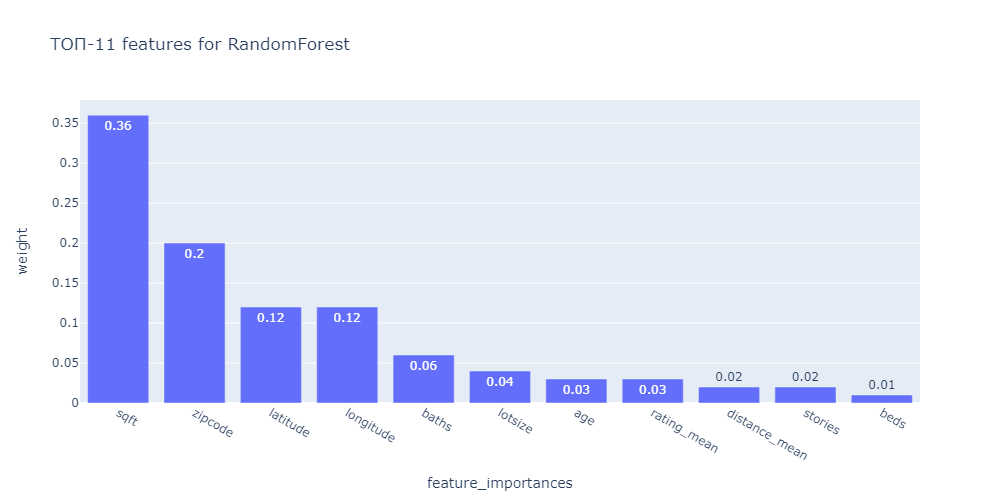

In [149]:
# визуализируем важные признаки в дереве решений
oo = pd.DataFrame([random_forest.feature_importances_], columns=X_train_scal[new_best].columns)
fig = px.bar( 
    x=list(oo.loc[0].sort_values(ascending=False).index),
    y=round(oo.loc[0].sort_values(ascending=False), 2),
    text_auto=True,
    title='ТОП-11 features for RandomForest',
    height=500, 
    width=1000,
    labels={'x':'feature_importances', 'y':'weight'}
       
)
fig.show()

In [150]:
# градиентный бустинг

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=9, #максимальная глубина дерева
    n_estimators=500, #количество деревьев в ансамбле
    random_state=42, #датчик генератора случайных чисел
    learning_rate=0.01
)

# Обучаем модель
gb.fit(X_train_scal[new_best], y_train)

# Формируем предсказание для тестовой выборки

y_train_pred  = gb.predict(X_train_scal[new_best])
y_test_pred = gb.predict(X_test_scal[new_best])

metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 122793.06
For TEST = 133573.81

MSE:
For TRAIN = 46169365915
For TEST = 58581174919

R2:
For TRAIN = 0.8
For TEST = 0.74


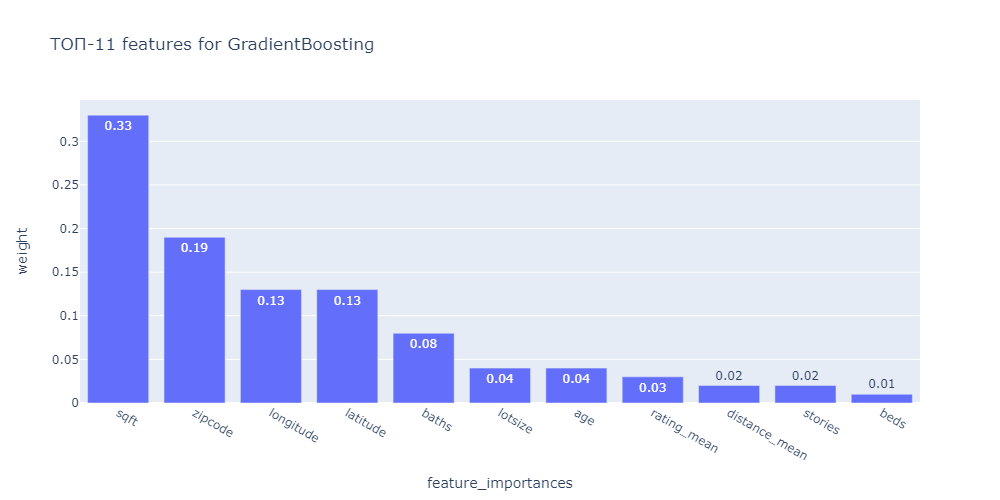

In [151]:
# визуализируем важные признаки в градинетном бустинге
aa = pd.DataFrame([gb.feature_importances_], columns=X_train_scal[new_best].columns)
fig = px.bar( 
    x=list(aa.loc[0].sort_values(ascending=False).index),
    y=round(aa.loc[0].sort_values(ascending=False), 2),
    text_auto=True,
    title='ТОП-11 features for GradientBoosting',
    height=500, 
    width=1000,
    labels={'x':'feature_importances', 'y':'weight'}
       
)
fig.show()

In [304]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scal[new_best], label=y_train, feature_names=new_best)
dtest = xgb.DMatrix(X_test_scal[new_best], label=y_test, feature_names=new_best)

# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dtest, 'valid')]
# Обучаем модель XGBoost
model_xgb = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

y_train_predict = model_xgb.predict(dtrain)
y_test_predict = model_xgb.predict(dtest)

metrics_func(y_train, y_train_predict, y_test, y_test_predict)

[0]	train-rmse:626913.07367	valid-rmse:628107.94419
[10]	train-rmse:374565.09054	valid-rmse:378408.35882
[20]	train-rmse:309853.30239	valid-rmse:315162.10224
[30]	train-rmse:288376.63875	valid-rmse:294668.33266
[40]	train-rmse:277242.67113	valid-rmse:284154.13905
[50]	train-rmse:270150.50173	valid-rmse:277609.40153
[60]	train-rmse:264568.75353	valid-rmse:272525.99697
[70]	train-rmse:259931.43841	valid-rmse:268210.48343
[80]	train-rmse:256710.09234	valid-rmse:265417.66549
[90]	train-rmse:254070.56201	valid-rmse:263231.77089
[100]	train-rmse:251676.51304	valid-rmse:261170.97184
[110]	train-rmse:249659.23004	valid-rmse:259571.69535
[120]	train-rmse:247013.66685	valid-rmse:257296.69917
[130]	train-rmse:245448.84206	valid-rmse:255966.72960
[140]	train-rmse:243193.97255	valid-rmse:254008.00739
[150]	train-rmse:240755.76916	valid-rmse:251926.97668
[160]	train-rmse:239118.98432	valid-rmse:250601.96874
[170]	train-rmse:237725.51253	valid-rmse:249529.79473
[180]	train-rmse:236303.64744	valid-rms

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

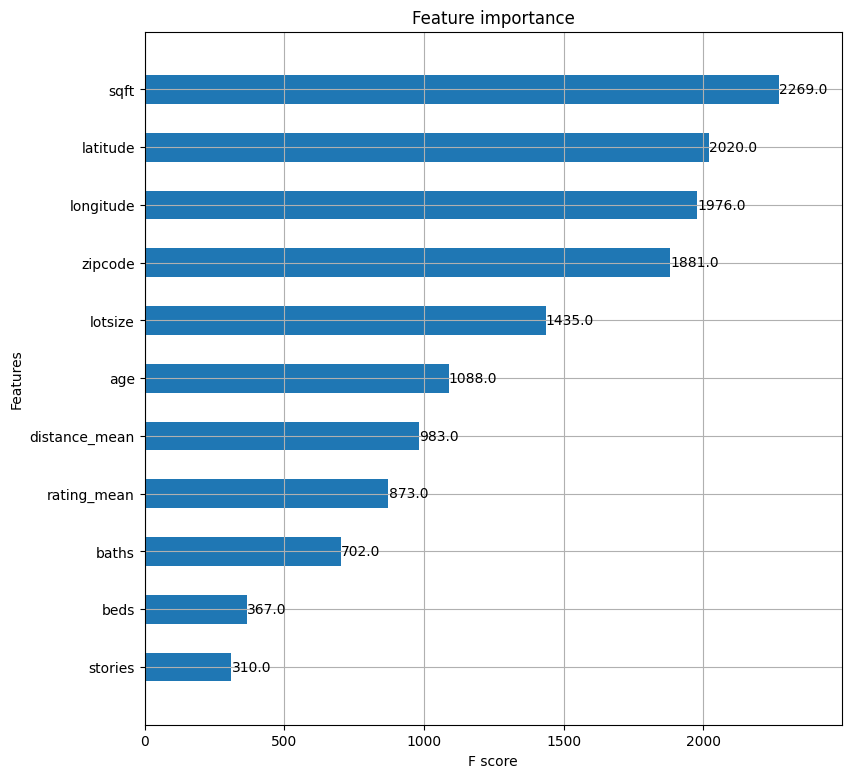

In [307]:
fig, ax = plt.subplots(figsize = (9,9))
xgb.plot_importance(model_xgb, ax = ax, height=0.5)

## 5. Оценка модели

Сделаем сводную таблицу со сводными данными по построенным моделям, выделены шрифтом модели с лучшими результатами. Принципиально по метрикам практическая разница несущественна, поэтому для дальнейшего развёртывания выберем модель RandomForest TOP-11 - у неё есть преимущества - нет необходимости производить нормальзацию признаков, хорошо параллелится вычисления, нет склонности к переобучению. Стоит обратить внимание, что данная модель даёт чуть более больший вес sqft(площади), чем другие модели.

|      Модель/Метрика            |  **R2** |  **MSE** |
|:-------------------|:------------------|:------------------|
|**Baseline** |   0.3/-0.19   |       158 219 290 108/271 204 864 430     |
|**LinearRegression TOP-25**|       0.24/0.24       |   171 176 319 404/172 129 476 873     | 
|**LinearRegression best_variables**  |    0.3/-0.19  |    158 220 886 283/271 184 415 880    | 
|**PolinominalFeature** |       0.34/0.33    |       149 881 332 123/152 423 137 039      | 
|**DecisiontreeRegressor TOP-25** |       0.61/0.53      |      87 256 673 728/105 750 631 695      | 
|**RandomForest TOP-25** |      0.73/0.62        |       62 151 689 742/85 820 337 092      | 
|**AdaBoost TOP-25** |       0.29/0.29       |       160 345 221 907/160 894 717 786   | 
|**GradientBoostingRegressor TOP-25** |       0.75/0.64        |       55 492 763 599/82 443 637 264      | 
|**CatBoost TOP-25** |       0.62/0.6       |      85 736 294 400/91 052 207 220   | 
|**CatBoost TOP-11**  |       **0.77/0.74**   |       **52 775 030 368/58 305 729 411**   | 
|**RandomForest TOP-11** |       **0.77/0.7**       |       **51 496 091 193/67 393 737 826**      | 
|**GradientBoostingRegressor TOP-11** |     **0.8/0.74**        |      **46 169 365 915/58 581 174 919**      | 
|**XGB TOP-11** |       **0.78/0.75**        |       **50 096 223 694/57 347 936 192**      | 

В итоге нам удалось повысить качество моделирования по сравнению с базовой моделью. Мы выбрали модель, оценили ей качество, приняли решение о внедрении, но в дальнейшем данную модель возможно усовершенствовать и улучшить, так, например:

1. Вернуться к признакам и обратить внимание на некоторые значения, которые мы ранее не заметили - пример будет ниже - необходимо эти объекты исключить. В примере - объект с индексом 263460 с площадью 456602479.0, что явно является ошибкой.
2. В объектах недвижимости имеются такие типы как земельные участки(land) и имеющий площадь дома(sqft) отличную от нуля, что логически трудно объяснить, либо убрать данные объекты при обучении модели/создать под них свою
3. Поработать с конечным результатом, который выдаёт модель - возможно будет разумнее выдавать пользователю сервиса не предсказание модели, а диапазон цен - доверительный интервал стоимости недвижимости вокруг предсказанного значения, например, +/-15%
4. Проработать признак sqft. В построенной модели значимость признака площади недвижимости(sqft) играет существенную роль, поэтому ранее, когда мы прорабатывали данный признак каких либо преобразований или очистку от выбросов не производили. Так, например, в данных имеются тип недвижимости дом на одну семью(single_family) с нулевой площадью, что является некорректным и т.д.
5. В моделировании - попробовать стекинг - несколько разных базовых моделей и метамодели, которая использует предсказания базовых моделей как признаки.
6. Разделить датасет на несколько(например, на 3) выборок(по целевому признаку), и построить для каждой свою, определить метрики.
7. Произвести кластеризацию датасета(по разным признакам) и использовать в качестве дополнительного признака
8. На цену недвижимости могут влиять разные факторы, мы можем сами в этом убедиться - объекты даже имеющие одинаковую площадь/локацию/и т.д. имеют разную цену т.е. на это могут влиять такие признаки:
- как "видовая квартира"/или нет
- угловая/нет 
- на какую сторону выходитят окна(север, юг, запад, восток)
- выполнен дизайнерский ремонт/или нет
- требует ремонта/нет и т.д.
- юридическая чистота/проблема с документами
эти признаки необходимо добавить в дальнейшем в данные для более точного и гибкого предсказания
9. Есть необходимость в проработке сервиса обратной связи после предсказания модели - где пользователю будет дана опция указать - цена занижена/завышена и его субъективная цена

In [48]:
X = date_estate.drop(['city', 'street', 'state', 'county', 'age_remodeled', 'price_sqft', 'target_clear'], axis=1)
y = date_estate['target_clear']
object_columns = [s for s in X.columns if X[s].dtypes == 'object']
X = pd.get_dummies(X, columns=object_columns, drop_first=True)

# анализ стандартизированных остатков
estate_outlier = sm.OLS(y, X.assign(const=1))
result = estate_outlier.fit()
influence = OLSInfluence(result)
sresiduals = influence.resid_studentized_internal
date_estate.iloc[[sresiduals.idxmax(), sresiduals.idxmin()]]

,status,propertyType,baths,city,zipcode,state,target_clear,street,county,latitude,longitude,sqft,stories,beds,heating,cooling,parking,lotsize,price_sqft,age,age_remodeled,rating_mean,distance_mean,schools_count
187566,active,land,0.00,Poinciana,34759,FL,3100000.0,rd,Polk,28.1293,-81.4630,0.0,1.0,3.0,forced air,central,attached,4961484.0,176.0,38.0,37.0,3.00,4.16,7.0
263460,active,multi family,2.25,Glendale,42740,KY,198000.0,s dixie hwy,Hardin,37.5944,-85.9406,456602479.0,1.0,3.0,other,central air,attached,456509.0,176.0,11.0,11.0,6.33,4.98,6.0


## 6. Внедрение

При подготовке модели к продакшену необходимо продумать логику сервиса, тут могут быть несколько вариантов:
- введение пользователем всех 11 характеристик недвижимости, но тогда требует проработки вопрос параметров latitude/longitude, либо их полностью отбросить и ориентироваться только на zipcode в качестве определения местоположения, либо, например, пользователь вводит город и сервис тянет его географические координаты и подставляет в модель
- использовать сервис построения на трёх главных признаках, далее после произведённого предсказания модели пользователю доступна опция "уточнить характеристики недвижимости" и ввести уже более подробные данные - число спален, этаж, кол-во санузлов и прочее по которым уже другая модель делает новое предсказание

Мы развернём модель и напишем веб-сервер(server.py) на Flask со всеми 11 признаками, а также клиентский сервис(client.py) для проверки.

Для начала переобучим нашу модель на ненормализованных данных так как в модель будем подавать именно их, и сериализуем модель в [файл](https://drive.google.com/file/d/1soQzKixtcDwP3n2pRMM7qeWN2JE4YDIM/view?usp=share_link):

In [9]:
random_forest_noscal = ensemble.RandomForestRegressor(n_estimators=200,
                                               max_depth=13,                                               
                                               criterion='squared_error',
                                               random_state=42)

random_forest_noscal.fit(X_train[new_best], y_train)

y_train_pred = random_forest_noscal.predict(X_train[new_best])
y_test_pred = random_forest_noscal.predict(X_test[new_best])
metrics_func(y_train, y_train_pred, y_test, y_test_pred)

MAE:
For TRAIN = 135513.59
For TEST = 149809.5

MSE:
For TRAIN = 51494907661
For TEST = 67392467488

R2:
For TRAIN = 0.77
For TEST = 0.7


In [10]:
with open('model.pkl', 'wb') as output:
    pickle.dump(random_forest_noscal, output)